In [2]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd  # Data manipulation and analysis library
import numpy as np  # Numerical computing library
import matplotlib  # Base library for plotting
import matplotlib.pyplot as plt  # Pyplot module for easy plotting
import seaborn as sns  # Advanced statistical plotting library

# Configuration and settings
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output
# Command for Jupyter to display plots inline
%matplotlib inline


In [1]:
# Import the drive module from the google.colab library.
# This module contains the necessary functions to mount your Google Drive.
from google.colab import drive

# Mount your Google Drive to the Colab Virtual Machine (VM).
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/master_thesis/Incidents_Responded_to_by_Fire_Companies.csv')

print(df.info())

In [ ]:
# Sample 200,000 rows without replacement
sampled_df = df.sample(n=200000, random_state=1)

# Save the sampled data to a new CSV file
sampled_df.to_csv('/content/drive/MyDrive/master_thesis/200K_Sample_Incidents_Responded_to_by_Fire_Companies.csv', index=False)

In [ ]:
# Import sampled data as main DF
df = pd.read_csv('/content/drive/MyDrive/master_thesis/200K_Sample_Incidents_Responded_to_by_Fire_Companies.csv')

# Print DF info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   IM_INCIDENT_KEY               200000 non-null  int64  
 1   FIRE_BOX                      200000 non-null  float64
 2   INCIDENT_TYPE_DESC            200000 non-null  object 
 3   INCIDENT_DATE_TIME            200000 non-null  object 
 4   ARRIVAL_DATE_TIME             194589 non-null  object 
 5   UNITS_ONSCENE                 194562 non-null  float64
 6   LAST_UNIT_CLEARED_DATE_TIME   199978 non-null  object 
 7   HIGHEST_LEVEL_DESC            199988 non-null  object 
 8   TOTAL_INCIDENT_DURATION       199962 non-null  float64
 9   ACTION_TAKEN1_DESC            200000 non-null  object 
 10  ACTION_TAKEN2_DESC            43553 non-null   object 
 11  ACTION_TAKEN3_DESC            18875 non-null   object 
 12  PROPERTY_USE_DESC             199999 non-nul

In [ ]:
def eda(df):
    # Check the input type
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Only pandas DataFrame is allowed as input")

    # Replace fields that are entirely space (or empty) with NaN to ensure they are recognized as missing values
    df = df.replace(r'^\s*$', np.nan, regex=True)

    # Display a preview of the data
    print("Preview of data:")
    display(df.head())

    # Display basic information about the DataFrame including the total number of entries, column types, and any null values
    print(df.info())

    # Calculate the total count of missing values for each column
    missing_count = df.isnull().sum()

    # Calculate the percentage of missing values
    missing_percentage = (missing_count / len(df)) * 100

    # Create a DataFrame to display column name and corresponding missing percentage
    missing_df = pd.DataFrame({'column_name': df.columns,
                               'missing_percentage': missing_percentage})

    # Sort the DataFrame by missing_percentage in descending order
    missing_df.sort_values('missing_percentage', inplace=True, ascending=False)

    print(str(missing_df['missing_percentage']))

    # Plotting
    plt.figure()
    bars = plt.barh(missing_df['column_name'], missing_df['missing_percentage'], color='steelblue')
    plt.title('Percentage of Missing Data by Column')
    plt.xlabel('Percentage of Missing Data')
    plt.ylabel('Column Name')

    # Calculate the maximum width of the bar to set xlim
    max_width = max(missing_df['missing_percentage']) * 1.1  # add 10% for padding

    # Set new x-axis limits to create space for text labels
    plt.xlim(0, max_width)

    # Add the data labels next to the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                f'{bar.get_width():.2f}%',  # format the label
                va='center', ha='left', fontsize=10, color='black')

    plt.gca().invert_yaxis()  # To display the highest percentage at the top
    plt.show()


    # Generate count statistics of duplicate entries and display them if there are any duplicates
    if df.duplicated().any():
        duplicate_count = df.duplicated().sum()
        print(f"\n***Number of duplicated entries: {duplicate_count}")
    else:
        print("\nNo duplicated entries found")

eda(df)

In [ ]:
# Set appropriate data types for various columns

# String data types
# These columns are identifiers or categorical features with alphanumeric entries,
# hence they are converted to string (object) data type for accurate representation and manipulation.
df['IM_INCIDENT_KEY'] = df['IM_INCIDENT_KEY'].astype('str')  # Incident key as a string
df['FIRE_BOX'] = df['FIRE_BOX'].astype('str')  # Fire box number as a string
df['STREET_HIGHWAY'] = df['STREET_HIGHWAY'].astype('str')  # Street or highway name as a string
df['ZIP_CODE'] = df['ZIP_CODE'].astype('str')  # Zip code as a string

# Categorical data types
# These columns represent categories and are converted to the 'category' data type,
# which is memory efficient and useful for analysis that involves categorical data.
df['INCIDENT_TYPE_DESC'] = df['INCIDENT_TYPE_DESC'].astype('category')  # Description of incident type
df['PROPERTY_USE_DESC'] = df['PROPERTY_USE_DESC'].astype('category')  # Description of property use
df['BOROUGH_DESC'] = df['BOROUGH_DESC'].astype('category')  # Description of borough
df['ACTION_TAKEN1_DESC'] = df['ACTION_TAKEN1_DESC'].astype('category') # The code and description of the first action taken
df['ACTION_TAKEN2_DESC'] = df['ACTION_TAKEN2_DESC'].astype('category') # The code and description of the second action taken
df['ACTION_TAKEN3_DESC'] = df['ACTION_TAKEN3_DESC'].astype('category') # The code and description of the third action taken
df['HIGHEST_LEVEL_DESC'] = df['HIGHEST_LEVEL_DESC'].astype('category') # The highest alarm level that the incident received
df['CO_DETECTOR_PRESENT_DESC'] = df['CO_DETECTOR_PRESENT_DESC'].astype('category') # Indicator for when a CO detector was present
df['FIRE_SPREAD_DESC'] = df['FIRE_SPREAD_DESC'].astype('category') # How far the fire spread from the object of origin
df['FIRE_ORIGIN_BELOW_GRADE_FLAG'] = df['FIRE_ORIGIN_BELOW_GRADE_FLAG'].astype('category') # Indicator for when the fire originated below grade
df['AES_PRESENCE_DESC'] = df['AES_PRESENCE_DESC'].astype('category') # Indicator for when an Automatic Extinguishing System is present
df['DETECTOR_PRESENCE_DESC'] = df['DETECTOR_PRESENCE_DESC'].astype('category') # Indicator for when a  detector was present
df['STANDPIPE_SYS_PRESENT_FLAG'] = df['STANDPIPE_SYS_PRESENT_FLAG'].astype('category') # Indicator for when a standpipe was present in the area of origin of a fire
df['FLOOR'] = df['FLOOR'].astype('category') # The floor of the building where the incident took place


# Numerical data type
# Columns representing numerical values are set to an integer data type.
# The 'errors' parameter is set to 'ignore' to avoid errors when conversion isn't possible,
# which can happen if there are missing or non-numeric values.
df['UNITS_ONSCENE'] = df['UNITS_ONSCENE'].astype('int64', errors='ignore')
df['TOTAL_INCIDENT_DURATION'] = df['TOTAL_INCIDENT_DURATION'].astype('int64', errors='ignore') # The total number of seconds from whe then incident was created to when the incident was closed
df['STORY_FIRE_ORIGIN_COUNT'] = df['STORY_FIRE_ORIGIN_COUNT'].astype('int64', errors='ignore') # Story in which the fire originated

# Datetime data types
# Columns representing dates and times are converted to the 'datetime64' data type
# to enable date and time operations and analyses.
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'])  # Incident date and time
df['ARRIVAL_DATE_TIME'] = pd.to_datetime(df['ARRIVAL_DATE_TIME'])  # Arrival date and time
df['LAST_UNIT_CLEARED_DATE_TIME'] = pd.to_datetime(df['LAST_UNIT_CLEARED_DATE_TIME'])  # The date and time that the incident was completed and the last unit cleared the scene

In [ ]:
# Display Summary Statistics of the DataFrame
print("Summary Statistics")
print(df.describe())

In [ ]:
# Calculate skewness for each column
skewness = df.skew()
print("Skewness of columns")
print(skewness)

Skewness of columns
IM_INCIDENT_KEY            0.145720
FIRE_BOX                   1.170575
UNITS_ONSCENE              5.852845
ZIP_CODE                        NaN
INCIDENT_MONTH            -0.036352
INCIDENT_DAY_OF_WEEK      -0.001384
INCIDENT_HOUR             -0.414913
RESPONSE_TIME            141.763603
RESPONSE_TIME_MINUTES    141.763603
dtype: float64


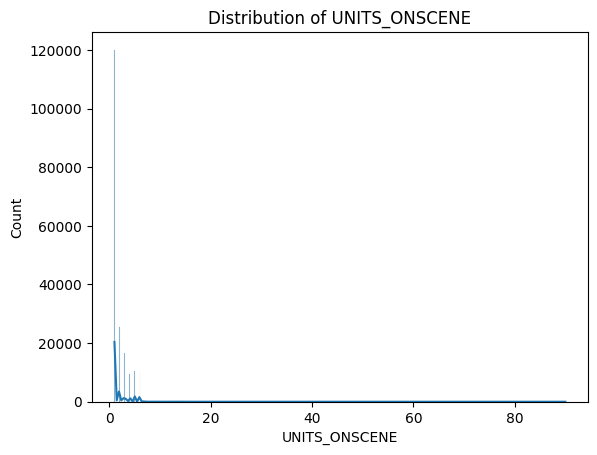

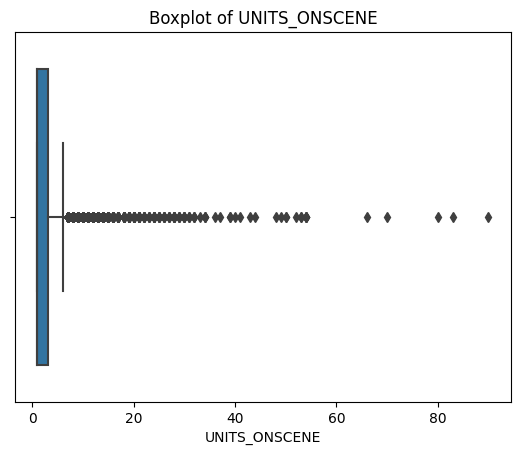

In [ ]:
# Creating a histogram plot of the 'UNITS_ONSCENE' column from the dataframe 'df'.
# The 'kde' parameter is set to True to include a Kernel Density Estimate plot over the histogram.
sns.histplot(data=df, x='UNITS_ONSCENE', kde=True)

# Setting the title of the histogram plot.
plt.title('Distribution of UNITS_ONSCENE')

# Displaying the histogram plot.
plt.show()

# Creating a boxplot of the 'UNITS_ONSCENE' column from the dataframe 'df'.
sns.boxplot(data=df, x='UNITS_ONSCENE')

# Setting the title of the boxplot.
plt.title('Boxplot of UNITS_ONSCENE')

# Displaying the boxplot.
plt.show()

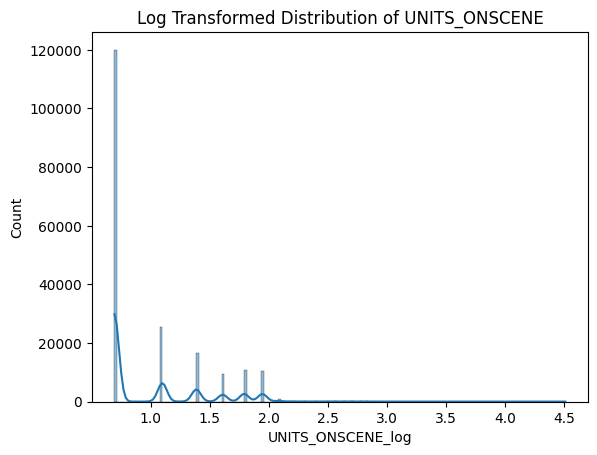

In [ ]:
import numpy as np

# Log transformation
df['UNITS_ONSCENE_log'] = np.log1p(df['UNITS_ONSCENE'])

# Visualize the transformed data
sns.histplot(data=df, x='UNITS_ONSCENE_log', kde=True)
plt.title('Log Transformed Distribution of UNITS_ONSCENE')
plt.show()

In [ ]:
# Feature extraction from datetime columns

# Extract the month of the incident
# This feature could be relevant for analyzing seasonal trends in incident reports.
df['INCIDENT_MONTH'] = df['INCIDENT_DATE_TIME'].dt.month

# Extract the day of the week of the incident
# This feature can be useful to identify any patterns in incident occurrence on specific days of the week.
df['INCIDENT_DAY_OF_WEEK'] = df['INCIDENT_DATE_TIME'].dt.dayofweek

# Extract the hour of the incident
# This feature helps in understanding at what times incidents are more likely to occur.
df['INCIDENT_HOUR'] = df['INCIDENT_DATE_TIME'].dt.hour

# Calculate the response time in seconds
# Response time is the duration from the incident being reported to the arrival of a unit.
# This is calculated by subtracting the 'INCIDENT_DATE_TIME' from 'ARRIVAL_DATE_TIME',
# and converting the result to total seconds. This metric is crucial for assessing the efficiency of response.
df['RESPONSE_TIME'] = (df['ARRIVAL_DATE_TIME'] - df['INCIDENT_DATE_TIME']).dt.total_seconds()

# Response time in minutes
df['RESPONSE_TIME_MINUTES'] = (df['RESPONSE_TIME'] / 60)

In [ ]:
# Identify columns related to post-incident actions and descriptions that may not be available during initial analysis,
# as well as columns with more than 90% of missing data
cols = [
    'ACTION_TAKEN1_DESC',  # The code and description of the first action taken
    'ARRIVAL_DATE_TIME',  # Arrival date and time
    'ACTION_TAKEN2_DESC',  # The code and description of the second action taken
    'ACTION_TAKEN3_DESC',  # The code and description of the third action taken
    'TOTAL_INCIDENT_DURATION',  # The total number of seconds from whe then incident was created to when the incident was closed
    'HIGHEST_LEVEL_DESC',  # The highest alarm level that the incident received
    'CO_DETECTOR_PRESENT_DESC',  # Indicator for when a CO detector was present
    'FIRE_SPREAD_DESC',  # How far the fire spread from the object of origin
    'LAST_UNIT_CLEARED_DATE_TIME',  # The date and time that the incident was completed and the last unit cleared the scene
    'FIRE_ORIGIN_BELOW_GRADE_FLAG', # Indicator for when the fire originated below grade
    'AES_PRESENCE_DESC', # Indicator for when an Automatic Extinguishing System is present
    'DETECTOR_PRESENCE_DESC', # Indicator for when a  detector was present
    'STORY_FIRE_ORIGIN_COUNT', # Story in which the fire originated
    'STANDPIPE_SYS_PRESENT_FLAG', # Indicator for when a standpipe was present in the area of origin of a fire
    ]
# Drop the identified columns from the DataFrame
df = df.drop(cols, axis='columns')

In [ ]:
def detect_null_values():
    # Detect and sum the number of null values in each column
    null_counts = df.isnull().sum()

    # Print the number of null values in each column
    print("Number of null values in each column:")
    for column, count in null_counts.items():
        print(f"{column}: {count}")

detect_null_values()

Number of null values in each column:
IM_INCIDENT_KEY: 0
FIRE_BOX: 0
INCIDENT_TYPE_DESC: 0
INCIDENT_DATE_TIME: 0
UNITS_ONSCENE: 5438
PROPERTY_USE_DESC: 1
STREET_HIGHWAY: 0
ZIP_CODE: 0
BOROUGH_DESC: 0
FLOOR: 157700
INCIDENT_MONTH: 0
INCIDENT_DAY_OF_WEEK: 0
INCIDENT_HOUR: 0
RESPONSE_TIME: 5411
RESPONSE_TIME_MINUTES: 5411
UNITS_ONSCENE_log: 5438


In [ ]:
def remove_null_values_from_columns(df, columns):
    # Remove rows with null values in the specified columns
    cleaned_df = df.dropna(subset=columns)

    return cleaned_df

df = remove_null_values_from_columns(df, ['UNITS_ONSCENE', 'UNITS_ONSCENE_log', 'RESPONSE_TIME', 'RESPONSE_TIME_MINUTES', 'PROPERTY_USE_DESC'])

In [ ]:
def remove_duplicates(df, subset=None, keep='first'):
    # Store the initial number of rows
    initial_row_count = len(df)

    # Remove duplicates as per the given 'subset' of columns and 'keep' criterion.
    cleaned_df = df.drop_duplicates(subset=subset, keep=keep)

    # Calculate and print the number of rows removed due to duplicate values
    removed_row_count = initial_row_count - len(cleaned_df)
    print(f"Number of rows removed as duplicate values: {removed_row_count}")

    # Return the DataFrame with duplicates removed.
    return cleaned_df

# Call the remove_duplicates function on the DataFrame 'df' to remove all duplicate rows.
df = remove_duplicates(df)

Number of rows removed as duplicate values: 24


                       UNITS_ONSCENE  INCIDENT_MONTH  INCIDENT_DAY_OF_WEEK  \
UNITS_ONSCENE               1.000000       -0.013731              0.002023   
INCIDENT_MONTH             -0.013731        1.000000              0.006315   
INCIDENT_DAY_OF_WEEK        0.002023        0.006315              1.000000   
INCIDENT_HOUR              -0.001724        0.003292             -0.014856   
RESPONSE_TIME              -0.093059        0.001066             -0.008866   
RESPONSE_TIME_MINUTES      -0.093059        0.001066             -0.008866   

                       INCIDENT_HOUR  RESPONSE_TIME  RESPONSE_TIME_MINUTES  
UNITS_ONSCENE              -0.001724      -0.093059              -0.093059  
INCIDENT_MONTH              0.003292       0.001066               0.001066  
INCIDENT_DAY_OF_WEEK       -0.014856      -0.008866              -0.008866  
INCIDENT_HOUR               1.000000      -0.041816              -0.041816  
RESPONSE_TIME              -0.041816       1.000000               1.

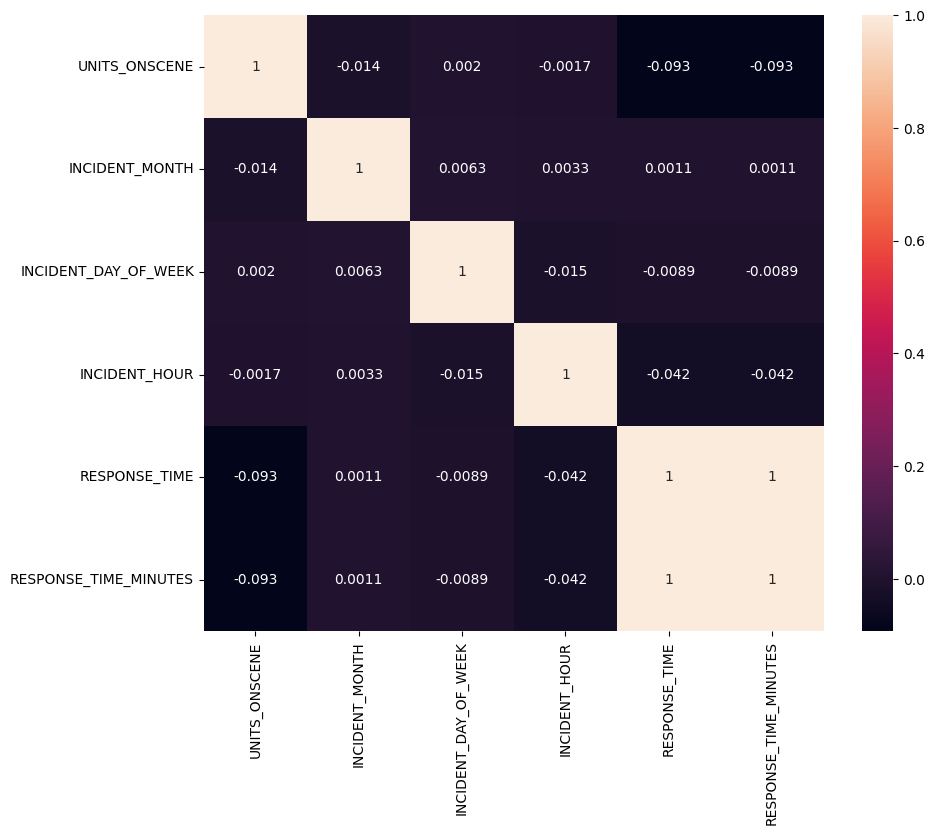

In [ ]:
# Correlation matrix
print(df.corr())

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Define a function to detect outliers in a dataframe column based on the Interquartile Range (IQR).
def detect_outliers_iqr(df, column):
    # Calculate the first quartile (Q1) and third quartile (Q3) of the specified column.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1.
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a condition to identify outliers (values outside the lower and upper bounds).
    outlier_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    # Extract the indices of the rows in the dataframe that meet the outlier condition.
    outliers = df.index[outlier_condition]

    # Return the indices of the outliers.
    return outliers

# Using the function to find outliers in the 'UNITS_ONSCENE' column of the dataframe 'df'.
outlier_indices = detect_outliers_iqr(df, 'UNITS_ONSCENE')

# Using the function to find outliers in the 'UNITS_ONSCENE_log' column of the dataframe 'df'.
#outlier_indices = detect_outliers_iqr(df, 'UNITS_ONSCENE_log')

# Displaying the rows in the dataframe that correspond to the outliers.
df.loc[outlier_indices]


,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,UNITS_ONSCENE,PROPERTY_USE_DESC,STREET_HIGHWAY,ZIP_CODE,BOROUGH_DESC,FLOOR,INCIDENT_MONTH,INCIDENT_DAY_OF_WEEK,INCIDENT_HOUR,RESPONSE_TIME,RESPONSE_TIME_MINUTES,UNITS_ONSCENE_log
391,61688556,1431.0,111 - Building fire,2017-06-30 14:35:20,10.0,429 - Multifamily dwelling,POWELL BLVD,10026.0,1 - Manhattan,3,6,4,14,256.0,4.266667,2.397895
585,62599991,422.0,111 - Building fire,2018-01-04 00:07:00,14.0,"460 - Dormitory-type residence, other",E 3 ST,10003.0,1 - Manhattan,NaN,1,3,0,172.0,2.866667,2.708050
806,58662853,955.0,111 - Building fire,2015-07-13 21:23:57,10.0,429 - Multifamily dwelling,ATLANTIC AVE,11216.0,4 - Brooklyn,2F,7,0,21,172.0,2.866667,2.397895
914,69337460,3955.0,111 - Building fire,2021-11-15 21:37:55,14.0,429 - Multifamily dwelling,PARK PL,11216.0,4 - Brooklyn,2,11,0,21,182.0,3.033333,2.708050
960,64548739,80.0,323 - Motor vehicle/pedestrian accident (MV Ped),2019-02-01 17:12:17,7.0,"960 - Street, other",NASSAU ST,10038.0,1 - Manhattan,NaN,2,4,17,376.0,6.266667,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199408,59128249,1064.0,"445 - Arcing, shorted electrical equipment",2015-11-07 07:13:54,7.0,"962 - Residential street, road or residential ...",ROME AVE,10304.0,3 - Staten Island,NaN,11,5,7,235.0,3.916667,2.079442
199617,55759818,1379.0,111 - Building fire,2013-02-01 10:03:22,14.0,"500 - Mercantile, business, other",BEACH 116 ST,11694.0,5 - Queens,1st,2,4,10,172.0,2.866667,2.708050
199798,58055712,3958.0,111 - Building fire,2015-02-15 09:26:02,9.0,429 - Multifamily dwelling,BELT PKWY N,11223.0,4 - Brooklyn,4,2,6,9,215.0,3.583333,2.302585
199869,60763316,7013.0,161 - Outside storage fire,2016-12-15 20:40:31,18.0,807 - Outside material storage area,43 ST,11378.0,5 - Queens,NaN,12,3,20,242.0,4.033333,2.944439


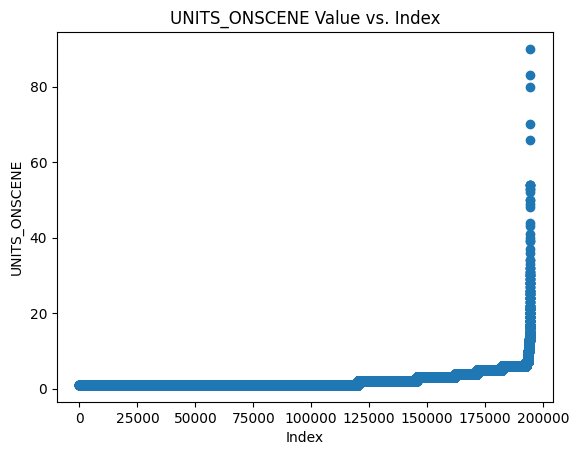

In [ ]:
# Visual inspection with scatter plot
import matplotlib.pyplot as plt

plt.scatter(range(df.shape[0]), np.sort(df['UNITS_ONSCENE'].values))
plt.xlabel('Index')
plt.ylabel('UNITS_ONSCENE')
plt.title("UNITS_ONSCENE Value vs. Index")
plt.show()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194533 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   IM_INCIDENT_KEY        194533 non-null  object        
 1   FIRE_BOX               194533 non-null  object        
 2   INCIDENT_TYPE_DESC     194533 non-null  category      
 3   INCIDENT_DATE_TIME     194533 non-null  datetime64[ns]
 4   UNITS_ONSCENE          194533 non-null  float64       
 5   PROPERTY_USE_DESC      194533 non-null  category      
 6   STREET_HIGHWAY         194533 non-null  object        
 7   ZIP_CODE               194533 non-null  object        
 8   BOROUGH_DESC           194533 non-null  category      
 9   FLOOR                  41386 non-null   category      
 10  INCIDENT_MONTH         194533 non-null  int64         
 11  INCIDENT_DAY_OF_WEEK   194533 non-null  int64         
 12  INCIDENT_HOUR          194533 non-null  int6

In [ ]:
def numeric_eda(df, hue=None):
    """
    Perform exploratory data analysis (EDA) on numeric columns of a pandas DataFrame.
    This function outputs statistics, box plots for individual columns, and pair plots
    to check the pairwise joint distribution of numeric data.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to analyze.
    hue (str, optional): The name of a column to use for color encoding in the pair plot.
                         If None, no color encoding will be used.

    Outputs:
    - A statistical summary table of the numeric columns, using `describe().T` for transpose.
    - Box plots of each numeric column to visualize the distribution and identify outliers.
    - A pair plot that shows the pairwise relationships between the numeric columns in the DataFrame.

    The function first prints a statistical summary of the numeric columns, then generates box plots for each
    numeric column to identify outliers and understand the distribution, and finally, it creates pair plots to
    visualize the relationships between the columns. The function will use a hue (color encoding) if specified,
    which is useful for observing how data points are distributed with respect to a categorical variable.
    """
    # Print a statistical summary of the numeric columns
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)  # Transpose for better readability

    # Box plots for numeric columns to visualize outliers and distributions
    numeric_columns = df.select_dtypes(include=np.number).columns
    n_cols = len(numeric_columns)
    plt.figure(figsize=(5 * n_cols, 10))  # Adjust figure size based on the number of numeric columns
    for index, col in enumerate(numeric_columns):
        plt.subplot(1, n_cols, index + 1)  # Create subplots for each numeric column
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})  # Create box plots without fill color
    plt.tight_layout()  # Adjust layout to prevent label overlap
    plt.show()

    # Pair plot for numeric data to check pairwise joint distribution and relationships
    print("\nTo check pairwise joint distribution of numeric data")
    if hue is None:
        sns.pairplot(df[numeric_columns])  # Pair plot without hue
    else:
        sns.pairplot(df[numeric_columns].join(df[[hue]]), hue=hue)  # Pair plot with hue for color encoding
    plt.show()


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
UNITS_ONSCENE,194562.0,2.028983,1.851697,1.000000,1.0,1.000000,3.000000,90.00
INCIDENT_MONTH,200000.0,6.547560,3.448325,1.000000,4.0,7.000000,10.000000,12.00
INCIDENT_DAY_OF_WEEK,200000.0,2.987430,1.993708,0.000000,1.0,3.000000,5.000000,6.00
INCIDENT_HOUR,200000.0,13.292650,6.254954,0.000000,9.0,14.000000,18.000000,23.00
RESPONSE_TIME,194589.0,320.087991,294.089289,5.000000,228.0,286.000000,361.000000,86415.00
RESPONSE_TIME_MINUTES,194589.0,5.334800,4.901488,0.083333,3.8,4.766667,6.016667,1440.25


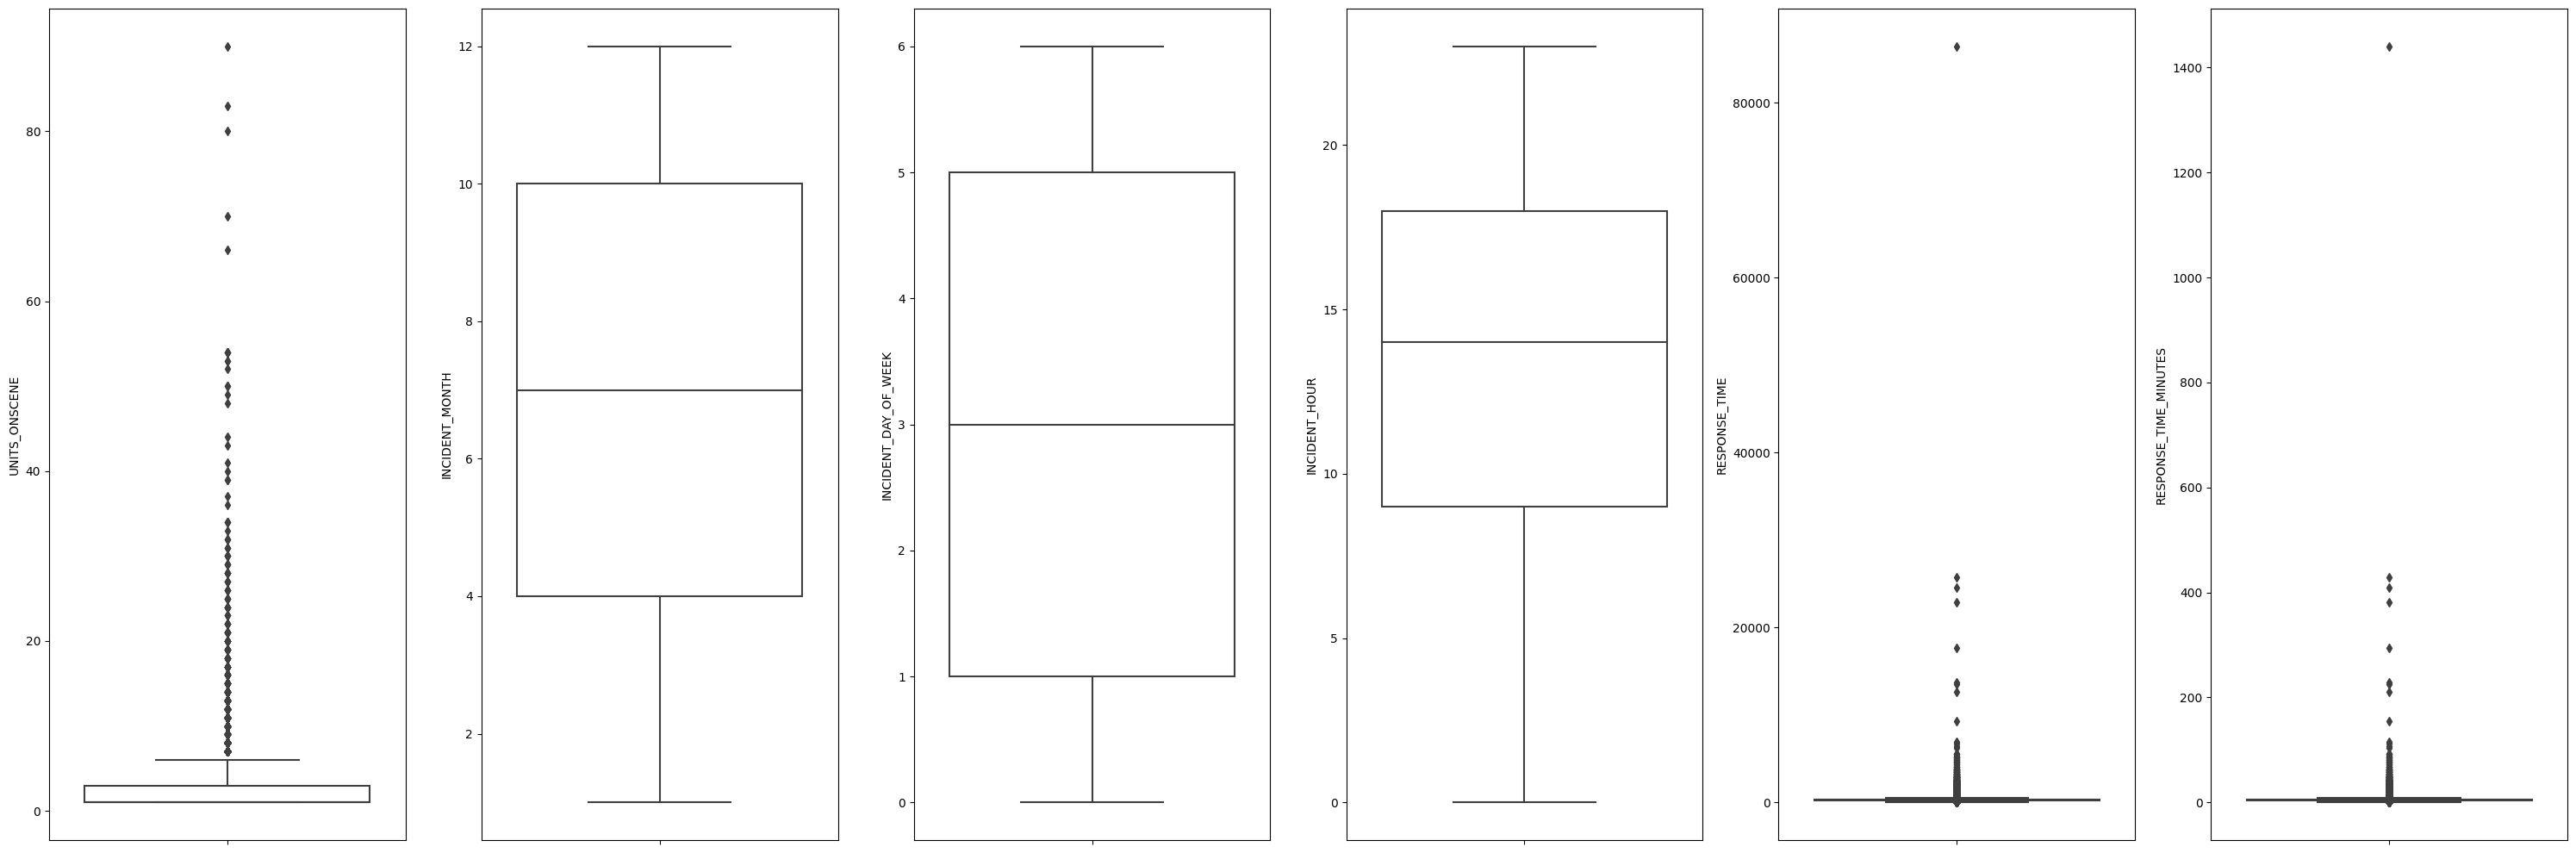


To check pairwise joint distribution of numeric data


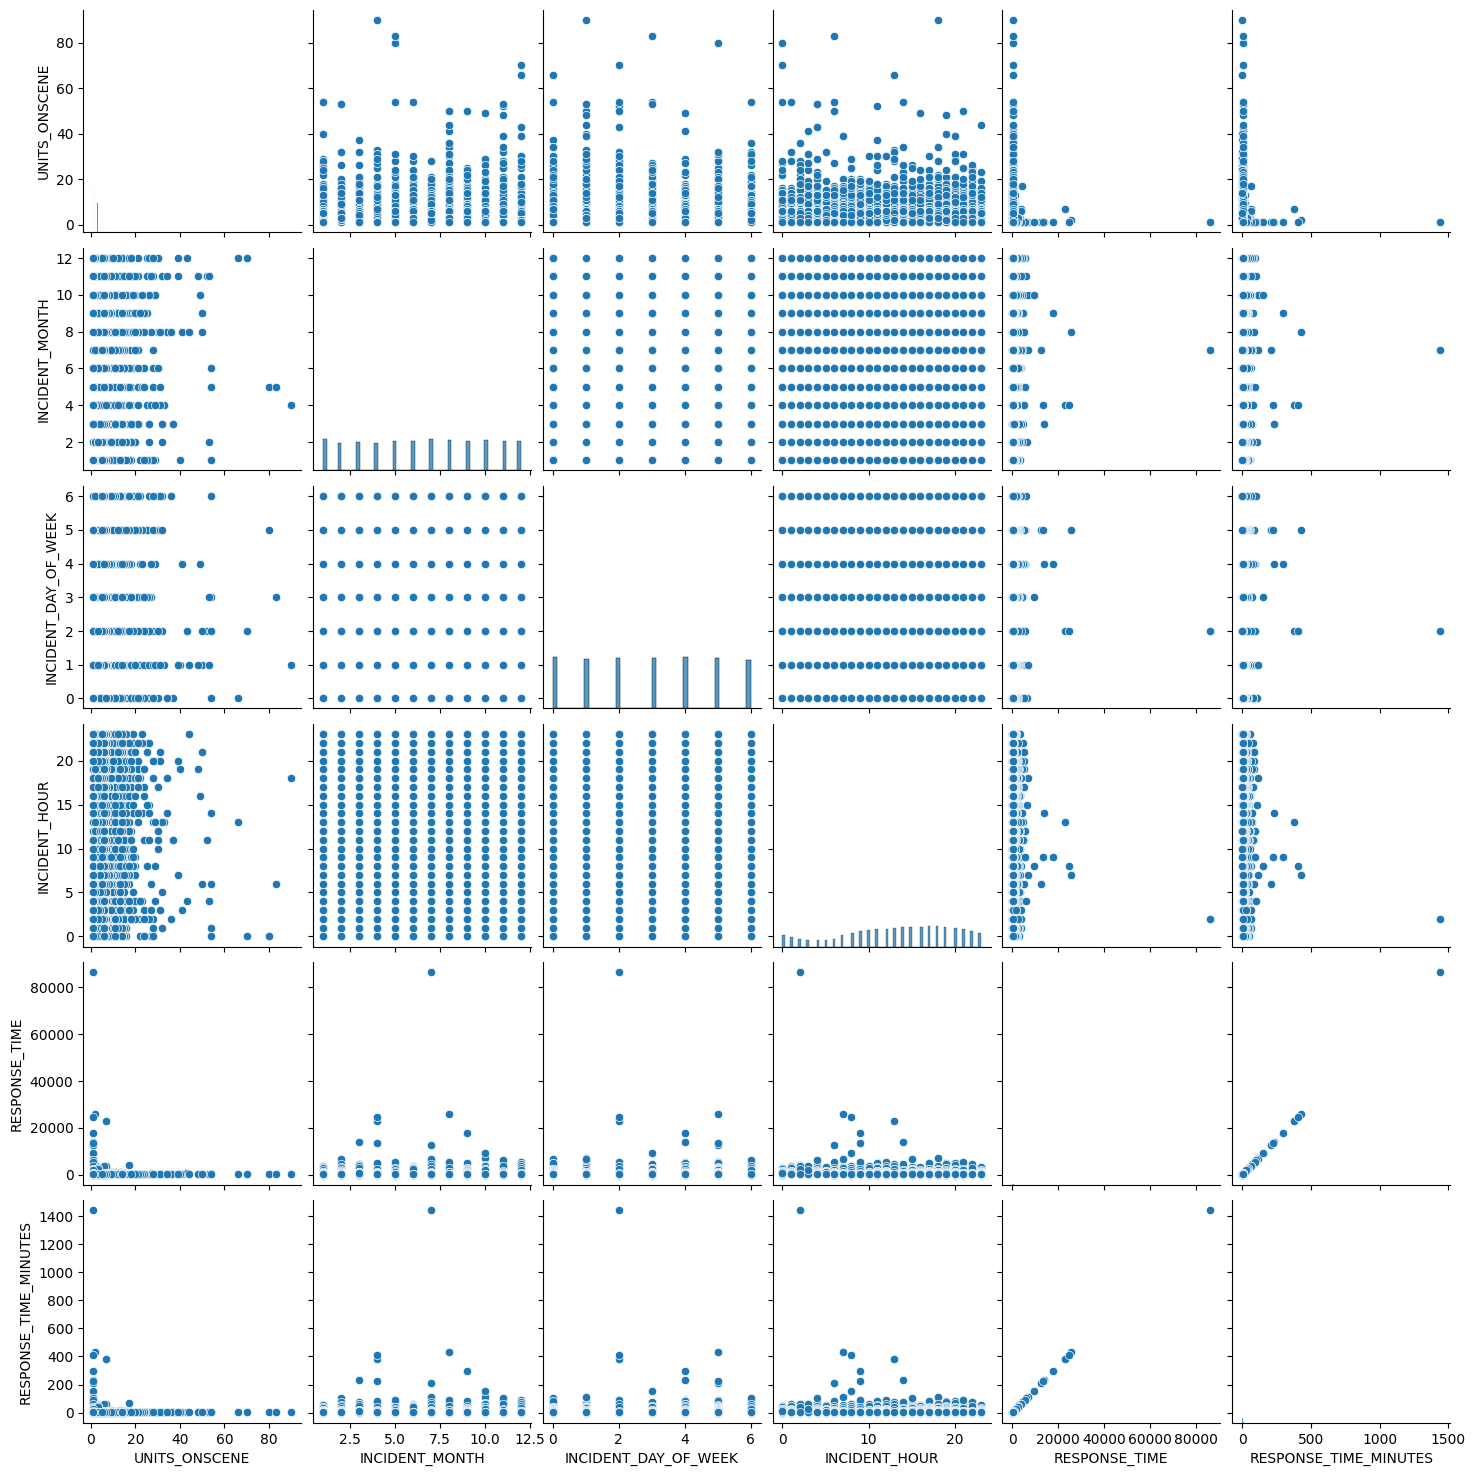

In [ ]:
# EDA of numeric data
numeric_eda(df)

                       UNITS_ONSCENE  INCIDENT_MONTH  INCIDENT_DAY_OF_WEEK  \
UNITS_ONSCENE               1.000000       -0.014099              0.002413   
INCIDENT_MONTH             -0.014099        1.000000              0.006227   
INCIDENT_DAY_OF_WEEK        0.002413        0.006227              1.000000   
INCIDENT_HOUR              -0.001463        0.003255             -0.014471   
RESPONSE_TIME              -0.093188        0.001074             -0.008868   
RESPONSE_TIME_MINUTES      -0.093188        0.001074             -0.008868   
UNITS_ONSCENE_log           0.929158       -0.014775              0.001937   

                       INCIDENT_HOUR  RESPONSE_TIME  RESPONSE_TIME_MINUTES  \
UNITS_ONSCENE              -0.001463      -0.093188              -0.093188   
INCIDENT_MONTH              0.003255       0.001074               0.001074   
INCIDENT_DAY_OF_WEEK       -0.014471      -0.008868              -0.008868   
INCIDENT_HOUR               1.000000      -0.041800            

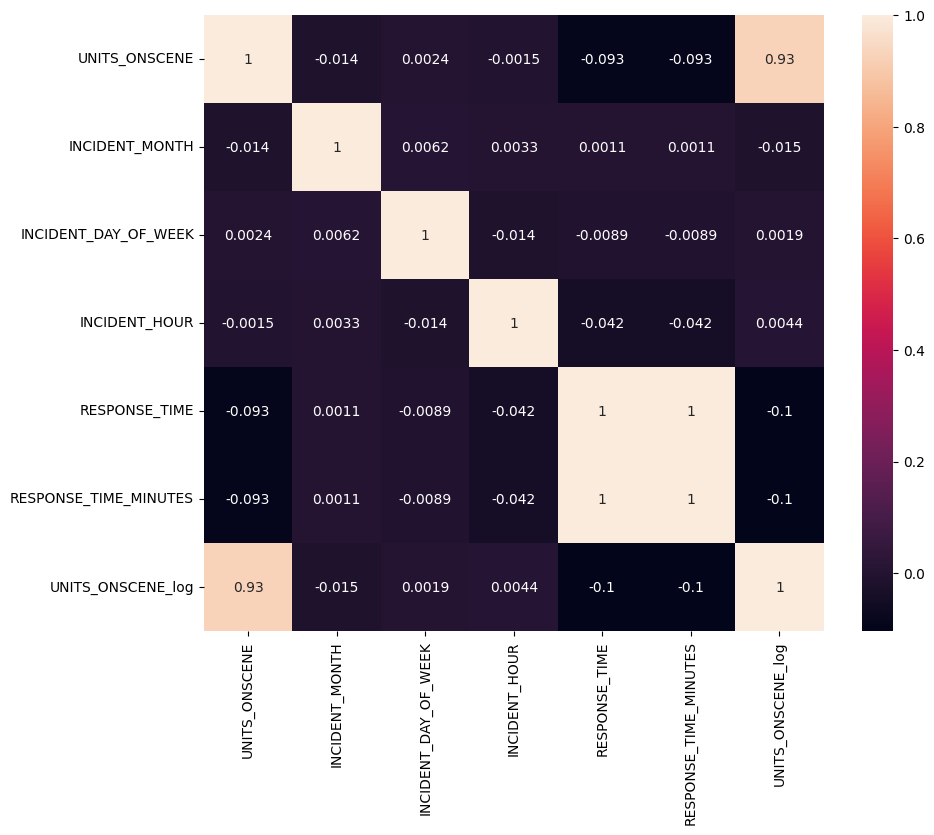

In [ ]:
# Correlation matrix
print(df.corr())

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194533 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   IM_INCIDENT_KEY        194533 non-null  object        
 1   FIRE_BOX               194533 non-null  object        
 2   INCIDENT_TYPE_DESC     194533 non-null  category      
 3   INCIDENT_DATE_TIME     194533 non-null  datetime64[ns]
 4   UNITS_ONSCENE          194533 non-null  float64       
 5   PROPERTY_USE_DESC      194533 non-null  category      
 6   STREET_HIGHWAY         194533 non-null  object        
 7   ZIP_CODE               194533 non-null  object        
 8   BOROUGH_DESC           194533 non-null  category      
 9   FLOOR                  41386 non-null   category      
 10  UNITS_ONSCENE_log      194533 non-null  float64       
 11  INCIDENT_MONTH         194533 non-null  int64         
 12  INCIDENT_DAY_OF_WEEK   194533 non-null  int6

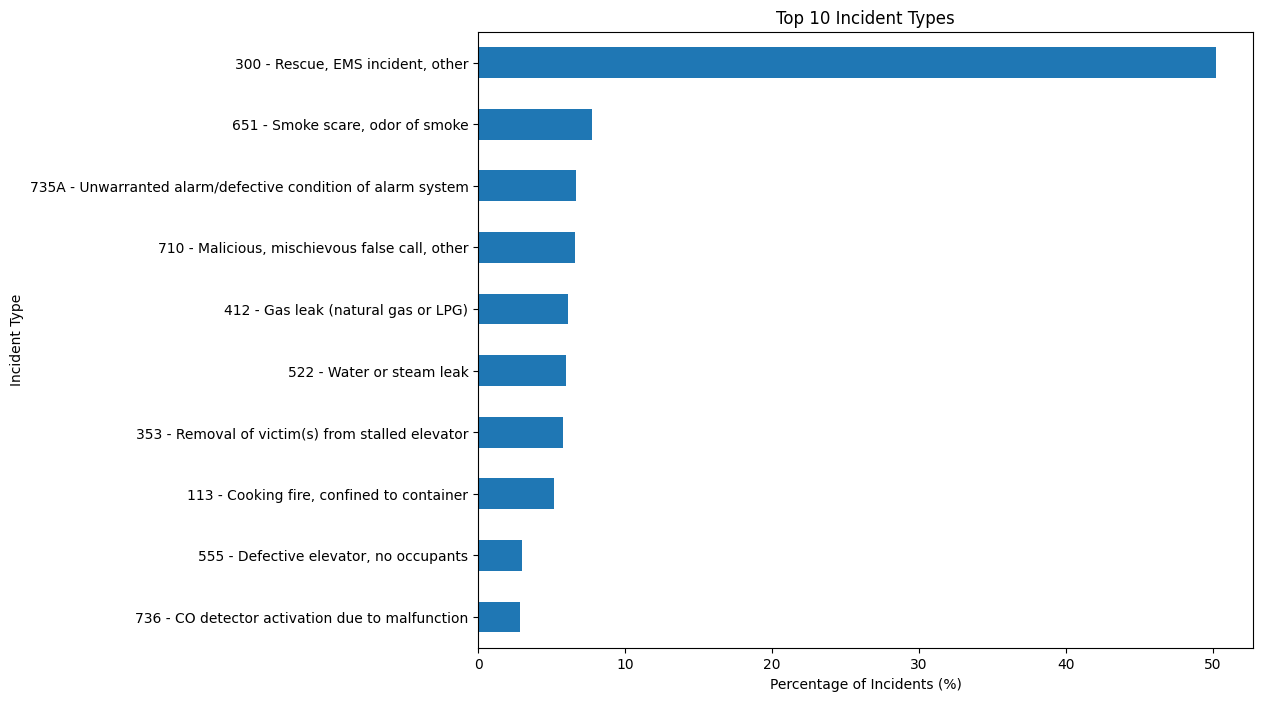

In [ ]:
# Calculate the count of each unique incident type in the dataset and retain the top 10 most frequent types.
top_incident_types = df['INCIDENT_TYPE_DESC'].value_counts().head(10)

# Calculate the percentage of each of these top 10 incident types out of the sum of their counts.
top_incident_types_percentage = (top_incident_types / top_incident_types.sum()) * 100

# Sort the percentages in descending order for the chart
top_incident_types_sorted = top_incident_types_percentage.sort_values(ascending=True)

# Generate a horizontal bar chart to display the top 10 incident types as a percentage of the total.
top_incident_types_sorted.plot(kind='barh', figsize=(10, 8))

# Title and labels are added to the chart for clarity.
plt.title('Top 10 Incident Types')
plt.xlabel('Percentage of Incidents (%)')
plt.ylabel('Incident Type')

# Display the plot.
plt.show()

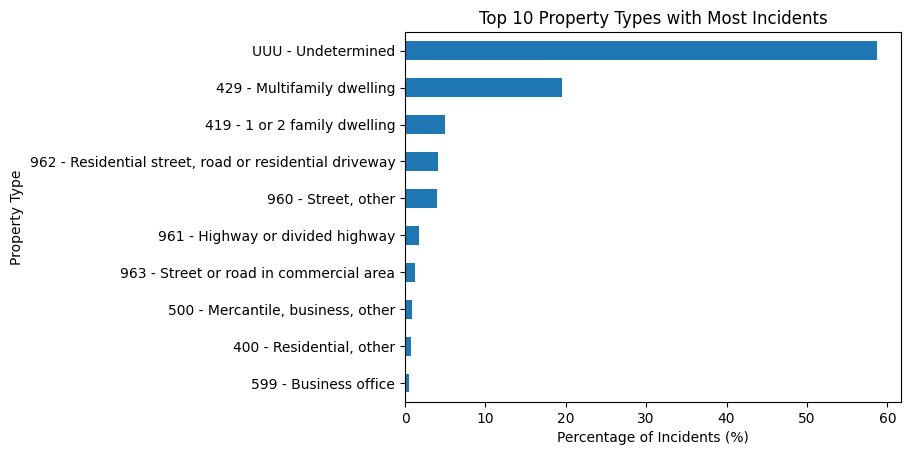

In [ ]:
# Top 10 Property Types with Most Incidents
# Calculate the count of incidents for each property type and retain the top 10 types with the most incidents.
top_property_types = df['PROPERTY_USE_DESC'].value_counts().head(10)

# Calculate the percentage of each of these top 10 property types out of the total number of property types.
# This provides a normalized view in terms of the overall frequency of incidents for each property type.
top_property_types_percentage = (top_property_types / df['PROPERTY_USE_DESC'].value_counts().sum()) * 100

# Sort the percentages in descending order for the chart
top_property_types_sorted = top_property_types_percentage.sort_values(ascending=True)

# Generate a horizontal bar chart to display the top 10 property types as a percentage of the total incidents.
# The 'barh' kind is specified to create a horizontal bar chart.
top_property_types_sorted.plot(kind='barh')

# Title and labels are added to the chart for clarity.
plt.title('Top 10 Property Types with Most Incidents')
plt.xlabel('Percentage of Incidents (%)')  # The x-axis represents the percentage of total incidents.
plt.ylabel('Property Type')  # The y-axis represents the different types of properties.

# Display the plot.
plt.show()

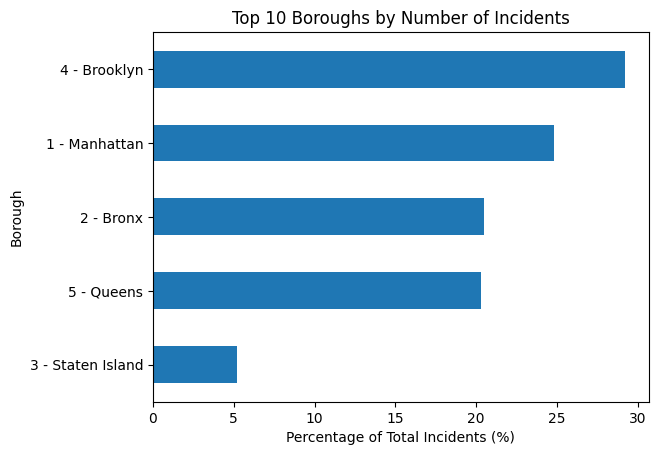

In [ ]:
# Top 10 Boroughs with Most Incidents
# Calculate the count of incidents for each borough using value_counts() method.
# This returns a Series containing counts of unique values in descending order so that the first element
# is the most frequently-occurring element.
top_boroughs = df['BOROUGH_DESC'].value_counts().head(10)

# Convert the counts to percentages of the total number of incidents.
top_boroughs_percentage = (top_boroughs / df['BOROUGH_DESC'].value_counts().sum()) * 100

# Sort the percentages in descending order for the chart
top_boroughs_sorted = top_boroughs_percentage.sort_values(ascending=True)

# Create a horizontal bar chart to visualize the top 10 boroughs.
# The 'barh' kind is specified to create a horizontal bar chart.
top_boroughs_sorted.plot(kind='barh')

# Title and labels are added to the chart for clarity.
plt.title('Top 10 Boroughs by Number of Incidents')
plt.xlabel('Percentage of Total Incidents (%)') # The x-axis represents the percentage of total incidents.
plt.ylabel('Borough') # The y-axis represents the different boroughs.

# Display the plot.
plt.show()

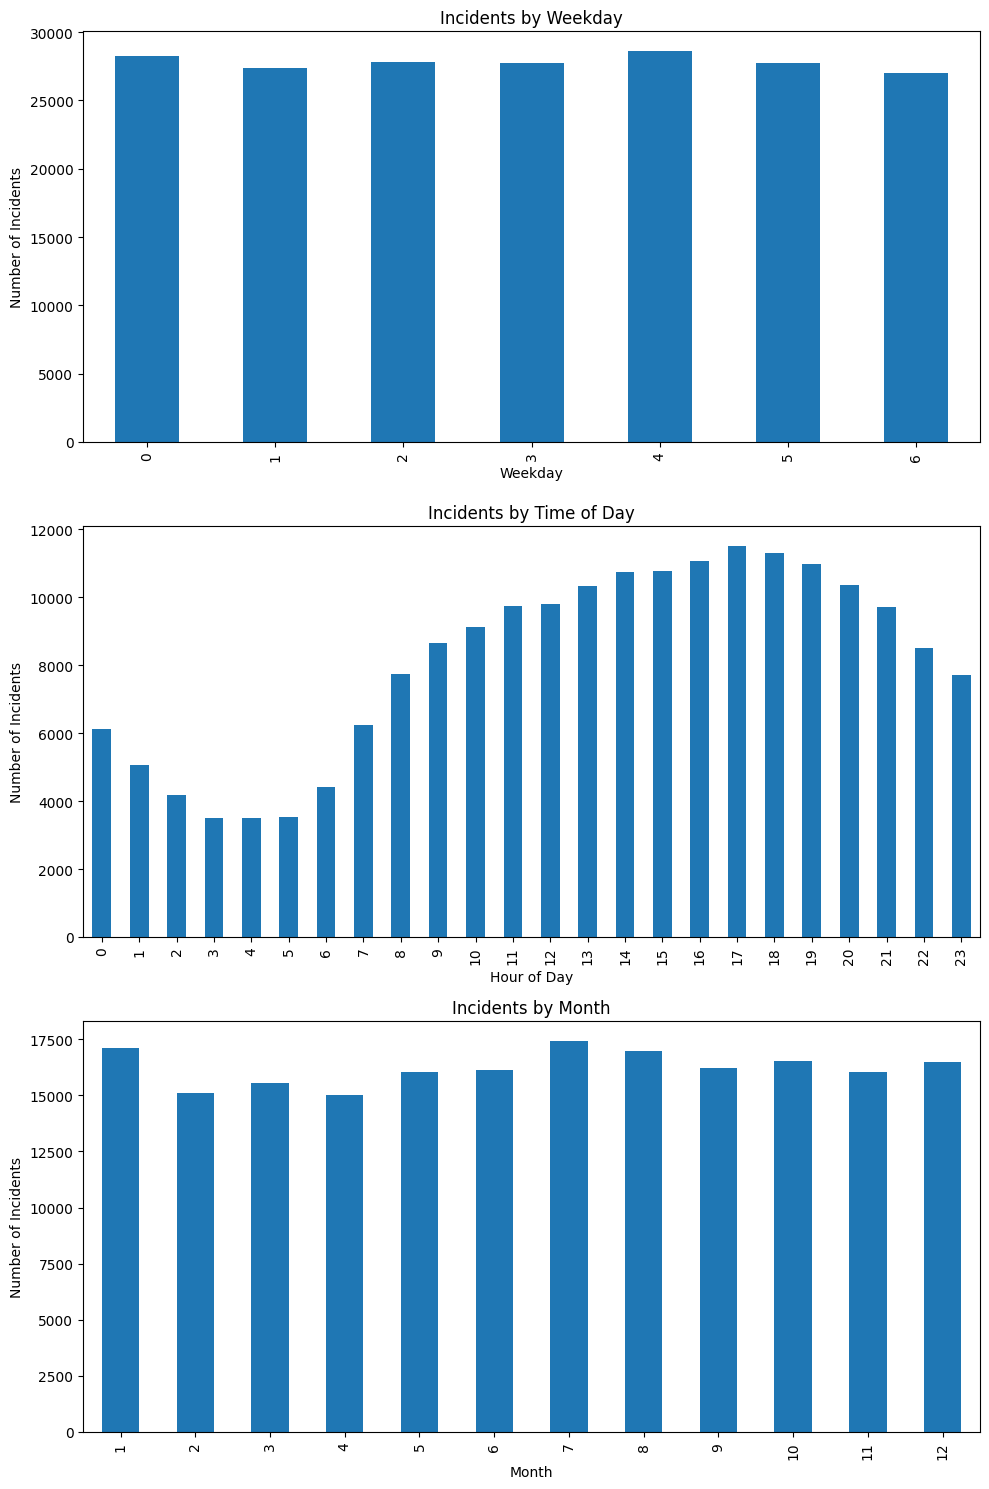

In [ ]:
# Incidents Breakup by Weekday, Time, and Month
# Create a figure with 3 subplots arranged vertically (3 rows, 1 column) and set the overall figure size.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Weekday Breakdown
# Count the number of incidents for each weekday, sorting by the index which represents days of the week (0=Monday, 6=Sunday).
weekday_counts = df['INCIDENT_DAY_OF_WEEK'].value_counts().sort_index()
# Plot a bar chart for incidents by weekday on the first subplot (axes[0]).
weekday_counts.plot(kind='bar', ax=axes[0])
# Set the title, x-axis label, and y-axis label for the first subplot.
axes[0].set_title('Incidents by Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Number of Incidents')

# Time of Day Breakdown
# Count the number of incidents for each hour of the day, sorting by the index which represents hours (0-23).
hour_counts = df['INCIDENT_HOUR'].value_counts().sort_index()
# Plot a bar chart for incidents by time of day on the second subplot (axes[1]).
hour_counts.plot(kind='bar', ax=axes[1])
# Set the title, x-axis label, and y-axis label for the second subplot.
axes[1].set_title('Incidents by Time of Day')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Incidents')

# Month Breakdown
# Count the number of incidents for each month, sorting by the index which represents months (1=January, 12=December).
month_counts = df['INCIDENT_MONTH'].value_counts().sort_index()
# Plot a bar chart for incidents by month on the third subplot (axes[2]).
month_counts.plot(kind='bar', ax=axes[2])
# Set the title, x-axis label, and y-axis label for the third subplot.
axes[2].set_title('Incidents by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Incidents')

# Adjust the layout so that there is no overlap and everything is displayed nicely.
plt.tight_layout()
# Display the combined figure with all three subplots.
plt.show()

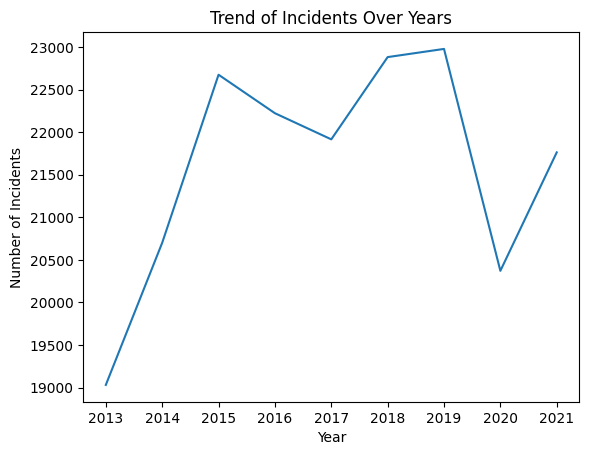

In [ ]:
# General Trend of Incidents Over Years
# Create a 'YEAR' column from 'INCIDENT_DATE_TIME' by extracting the year component.
df['YEAR'] = df['INCIDENT_DATE_TIME'].dt.year

# Calculate the count of incidents for each year and sort by year to prepare for time series plotting.
yearly_counts = df['YEAR'].value_counts().sort_index()

# Plot a line chart to represent the trend of incidents over the years.
# A line chart is appropriate for time series data to show how the number of incidents changes over time.
yearly_counts.plot(kind='line')

# Title and labels are added to the graph for clarity.
plt.title('Trend of Incidents Over Years')
plt.ylabel('Number of Incidents') # Shows the count of incidents
plt.xlabel('Year') # Shows the year in which incidents occurred


# Display the plot.
plt.show()

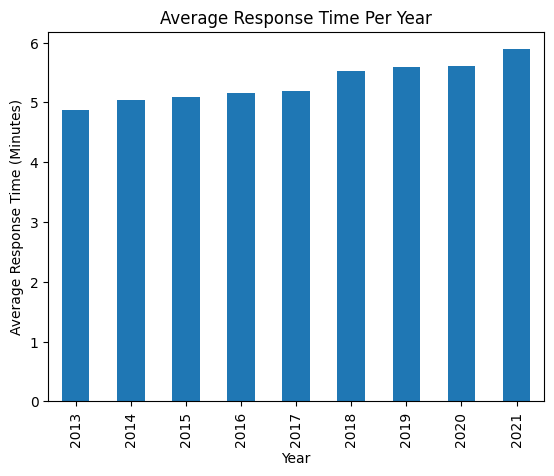

In [ ]:
# Average Response Time Per Year
# Group the data by the year of the 'INCIDENT_DATE_TIME' column and calculate the mean of the 'RESPONSE_TIME_MINUTES' for each group.
# This gives the average response time in minutes for each year.
average_response_time_yearly = df.groupby(df['INCIDENT_DATE_TIME'].dt.year)['RESPONSE_TIME_MINUTES'].mean()

# Plot a bar chart to represent the average response time for each year.
average_response_time_yearly.plot(kind='bar')

# Title and labels are added to the chart's for clarity.
plt.title('Average Response Time Per Year')
plt.ylabel('Average Response Time (Minutes)') # Shows the average time it takes for units to respond, measured in minutes.
plt.xlabel('Year') # This label identifies each bar in the chart as a different year.

# Display the plot.
plt.show()

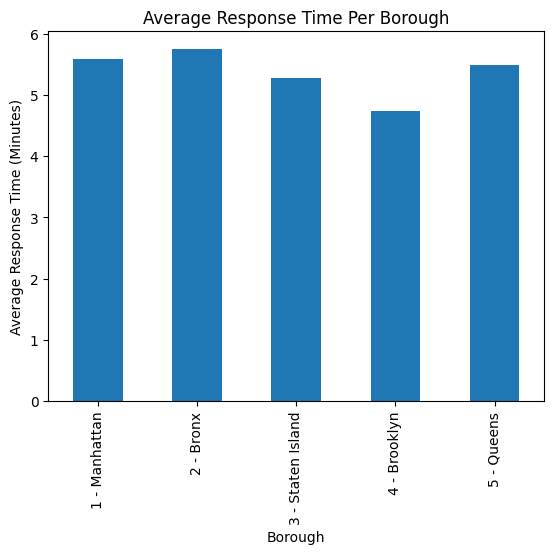

In [ ]:
# Average Response Time Per Borough
# Group the dataset by the 'BOROUGH_DESC' column, which contains the borough descriptions.
# Then calculate the mean of the 'RESPONSE_TIME_MINUTES' for each group (borough).
# This will yield the average response time for each borough.
average_response_time_borough = df.groupby('BOROUGH_DESC')['RESPONSE_TIME_MINUTES'].mean()

# Create a bar chart using the average response times for each borough.
# The 'kind' parameter is set to 'bar' to specify a vertical bar chart.
average_response_time_borough.plot(kind='bar')

# Title and labels are added to the chart's for clarity.
plt.title('Average Response Time Per Borough')
plt.ylabel('Average Response Time (Minutes)') # Represents response time in minutes
plt.xlabel('Borough') # Each bar corresponds to a different borough

# Display the plot.
plt.show()

In [ ]:
# Define a dictionary to hold the potential outliers for each column
outliers_dict = {}

# List of columns to check for outliers
columns_to_check = ['UNITS_ONSCENE', 'UNITS_ONSCENE_log', 'INCIDENT_MONTH', 'INCIDENT_DAY_OF_WEEK', 'INCIDENT_HOUR', 'RESPONSE_TIME']

# Loop through each column to calculate and print the count of outliers
for column in columns_to_check:
    # Define an upper limit for what is considered a plausible value (e.g., 95th percentile)
    upper_limit = df[column].quantile(0.95)

    # Identify potential outliers - values that are above the 95th percentile
    potential_outliers = df[df[column] > upper_limit]

    # Store the potential outliers in the dictionary
    outliers_dict[column] = potential_outliers

    # Print the count of outliers for the current column
    print(f"Column '{column}': {len(potential_outliers)} potential outliers")


Column 'UNITS_ONSCENE': 1902 potential outliers
Column 'UNITS_ONSCENE_log': 1902 potential outliers
Column 'INCIDENT_MONTH': 0 potential outliers
Column 'INCIDENT_DAY_OF_WEEK': 0 potential outliers
Column 'INCIDENT_HOUR': 7710 potential outliers
Column 'RESPONSE_TIME': 9669 potential outliers


In [ ]:
# Group data by 'INCIDENT_TYPE_DESC' and calculate average 'UNITS_ONSCENE' for each type
avg_units_per_type = df.groupby('INCIDENT_TYPE_DESC')['UNITS_ONSCENE'].mean().sort_values(ascending=False)

# Display the average 'UNITS_ONSCENE' for each 'INCIDENT_TYPE_DESC' as a table
print("Average Units On Scene by Incident Type:")
print(avg_units_per_type)

# Identify outliers in 'UNITS_ONSCENE'
outliers = df[df['UNITS_ONSCENE'] > df['UNITS_ONSCENE'].quantile(0.95)]
outlier_incident_types = outliers['INCIDENT_TYPE_DESC'].value_counts()

# Display the count of outlier incidents for each incident type as a table
print("\nCount of Outlier Incidents by Incident Type:")
print(outlier_incident_types)


Average Units On Scene by Incident Type:
INCIDENT_TYPE_DESC
111 - Building fire                                                        12.262488
161 - Outside storage fire                                                 11.000000
430 - Radioactive condition, other                                          9.000000
354 - Trench/below-grade rescue                                             8.400000
362 - Ice rescue                                                            8.000000
                                                                             ...    
353V - Stalled occupied elevator in blind shaft-removal via wall breach     1.000000
143 - Grass fire                                                            1.000000
541 - Animal problem                                                        1.000000
812 - Flood assessment                                                      1.000000
672 - Biological hazard investigation, none found                           1.000000
Name:

                       UNITS_ONSCENE  UNITS_ONSCENE_log  INCIDENT_MONTH  \
UNITS_ONSCENE               1.000000           0.929158       -0.014099   
UNITS_ONSCENE_log           0.929158           1.000000       -0.014775   
INCIDENT_MONTH             -0.014099          -0.014775        1.000000   
INCIDENT_DAY_OF_WEEK        0.002413           0.001937        0.006227   
INCIDENT_HOUR              -0.001463           0.004397        0.003255   
RESPONSE_TIME              -0.093188          -0.104347        0.001074   
RESPONSE_TIME_MINUTES      -0.093188          -0.104347        0.001074   
YEAR                       -0.059974          -0.066713        0.012724   

                       INCIDENT_DAY_OF_WEEK  INCIDENT_HOUR  RESPONSE_TIME  \
UNITS_ONSCENE                      0.002413      -0.001463      -0.093188   
UNITS_ONSCENE_log                  0.001937       0.004397      -0.104347   
INCIDENT_MONTH                     0.006227       0.003255       0.001074   
INCIDENT_DAY_OF_

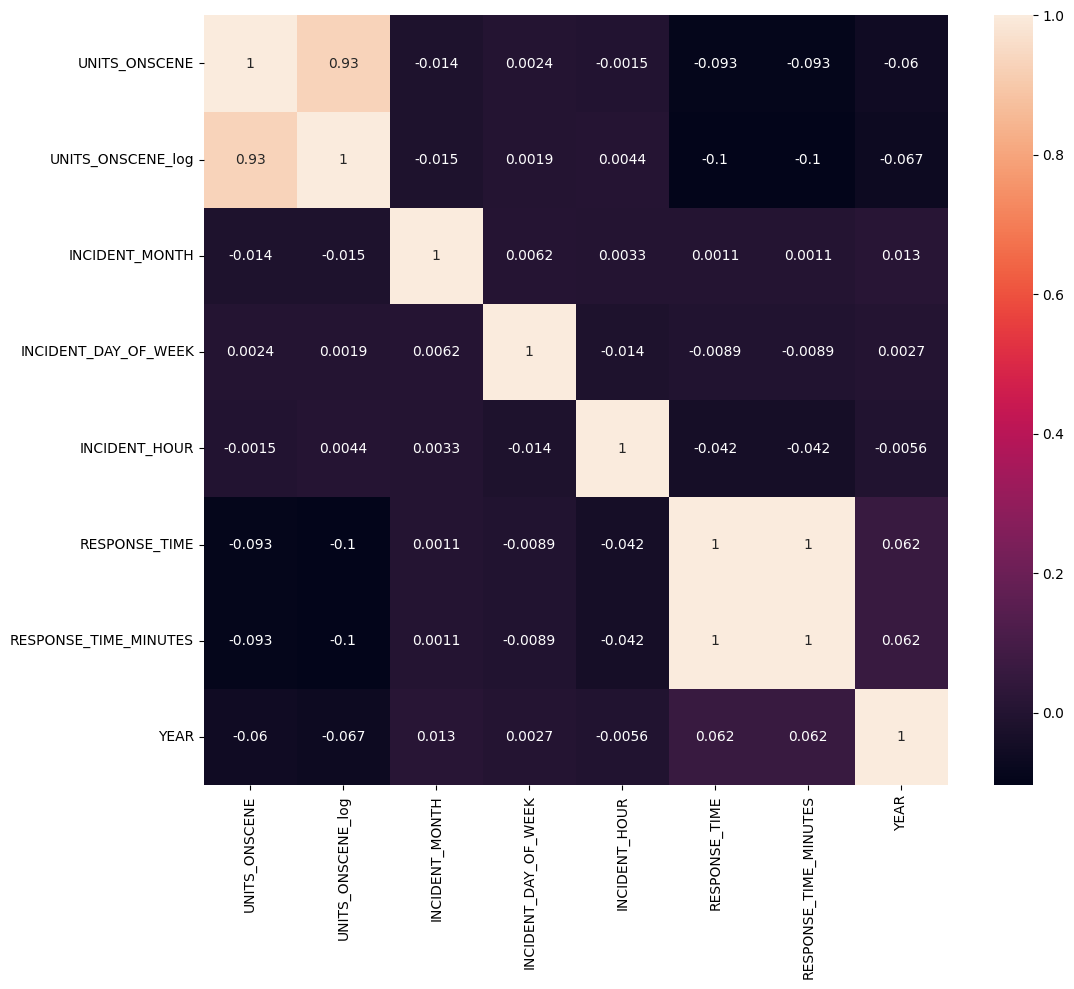

In [ ]:
# Correlation matrix
print(df.corr())

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
import pandas as pd

# Load the datasets
df_incidents = pd.read_csv('/content/drive/MyDrive/master_thesis/ProcessedDF_Incidents_Responded_to_by_Fire_Companies.csv')
df_alarm_box = pd.read_csv('/content/drive/MyDrive/master_thesis/In-Service_Alarm_Box_Locations_20231204.csv')

# Prepare the BOROUGH_DESC column in df_incidents
df_incidents['BOROUGH_DESC'] = df_incidents['BOROUGH_DESC'].str.split(' - ').str[1]

# Format the FIRE_BOX column in df_incidents
df_incidents['FIRE_BOX'] = df_incidents['FIRE_BOX'].astype(int).astype(str).str.zfill(4)

# Format the BOROBOX column in df_alarm_box
df_alarm_box['BOROBOX'] = df_alarm_box['BOROBOX'].str[1:]

# Dropping duplicates in df_alarm_box based on BOROBOX and BOROUGH
df_alarm_box_unique = df_alarm_box.drop_duplicates(subset=['BOROBOX', 'BOROUGH'], keep='first')

# Create a dictionary for latitude and longitude
latitude_dict = df_alarm_box_unique.set_index(['BOROBOX', 'BOROUGH'])['LATITUDE']
longitude_dict = df_alarm_box_unique.set_index(['BOROBOX', 'BOROUGH'])['LONGITUDE']

# Map the latitude and longitude to df_incidents using a multi-index map
df_incidents['LATITUDE'] = df_incidents.set_index(['FIRE_BOX', 'BOROUGH_DESC']).index.map(latitude_dict)
df_incidents['LONGITUDE'] = df_incidents.set_index(['FIRE_BOX', 'BOROUGH_DESC']).index.map(longitude_dict)

# Reset the index of df_incidents
df_incidents.reset_index(drop=True, inplace=True)

# Display the result
df_incidents.head()

df = df_incidents

In [ ]:
# Save the sampled data to a new CSV file
df.to_csv('/content/drive/MyDrive/master_thesis/Merged_Coordidnates_Incidents_Responded_to_by_Fire_Companies1.csv', index=False)

In [22]:
# Read in the final dataset
df = pd.read_csv('/content/drive/MyDrive/master_thesis/Merged_Coordidnates_Incidents_Responded_to_by_Fire_Companies1.csv')

df.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,UNITS_ONSCENE,PROPERTY_USE_DESC,STREET_HIGHWAY,ZIP_CODE,BOROUGH_DESC,FLOOR,INCIDENT_MONTH,INCIDENT_DAY_OF_WEEK,INCIDENT_HOUR,RESPONSE_TIME,RESPONSE_TIME_MINUTES,UNITS_ONSCENE_log,YEAR,LATITUDE,LONGITUDE
0,55780057,3867,"300 - Rescue, EMS incident, other",2013-02-09 01:12:03,2.0,UUU - Undetermined,54 ST,11204.0,Brooklyn,NaN,2,5,1,372.0,6.200000,1.098612,2013,NaN,NaN
1,64479568,3283,"651 - Smoke scare, odor of smoke",2019-01-19 09:55:25,3.0,UUU - Undetermined,BEDFORD AVE,11235.0,Brooklyn,NaN,1,5,9,404.0,6.733333,1.386294,2019,40.586890,-73.943186
2,64542422,4939,"118 - Trash or rubbish fire, contained",2019-01-31 14:52:12,4.0,429 - Multifamily dwelling,PARSONS BLVD,11365.0,Queens,1,1,3,14,290.0,4.833333,1.609438,2019,40.733434,-73.810550
3,65603083,4927,5001 - Cable / Telephone Wires Down,2019-09-03 10:04:38,1.0,"962 - Residential street, road or residential ...",126 ST,11420.0,Queens,NaN,9,1,10,503.0,8.383333,0.693147,2019,40.675245,-73.812549
4,56846127,4711,"710 - Malicious, mischievous false call, other",2014-02-12 03:16:35,1.0,UUU - Undetermined,NaN,11434.0,Queens,NaN,2,2,3,384.0,6.400000,0.693147,2014,40.673634,-73.763832


In [23]:
# Set appropriate data types for various columns

# String data types
# These columns are identifiers or categorical features with alphanumeric entries,
# hence they are converted to string (object) data type for accurate representation and manipulation.
df['IM_INCIDENT_KEY'] = df['IM_INCIDENT_KEY'].astype('str')  # Incident key as a string
df['FIRE_BOX'] = df['FIRE_BOX'].astype('str')  # Fire box number as a string
df['STREET_HIGHWAY'] = df['STREET_HIGHWAY'].astype('str')  # Street or highway name as a string
df['ZIP_CODE'] = df['ZIP_CODE'].astype('str')  # Zip code as a string

# Categorical data types
# These columns represent categories and are converted to the 'category' data type,
# which is memory efficient and useful for analysis that involves categorical data.
df['INCIDENT_TYPE_DESC'] = df['INCIDENT_TYPE_DESC'].astype('category')  # Description of incident type
df['PROPERTY_USE_DESC'] = df['PROPERTY_USE_DESC'].astype('category')  # Description of property use
df['BOROUGH_DESC'] = df['BOROUGH_DESC'].astype('category')  # Description of borough
df['FLOOR'] = df['FLOOR'].astype('category') # The floor of the building where the incident took place


# Numerical data type
# Columns representing numerical values are set to an integer data type.
# The 'errors' parameter is set to 'ignore' to avoid errors when conversion isn't possible,
# which can happen if there are missing or non-numeric values.
df['UNITS_ONSCENE'] = df['UNITS_ONSCENE'].astype('int64', errors='ignore')
df['UNITS_ONSCENE_log'] = df['UNITS_ONSCENE'].astype('float64', errors='ignore')
df['RESPONSE_TIME'] = df['RESPONSE_TIME'].astype('int64', errors='ignore')
df['RESPONSE_TIME_MINUTES'] = df['RESPONSE_TIME_MINUTES'].astype('float64', errors='ignore')
df['LATITUDE'] = df['LATITUDE'].astype('float64', errors='ignore')
df['LONGITUDE'] = df['LONGITUDE'].astype('float64', errors='ignore')

# Datetime data types
# Columns representing dates and times are converted to the 'datetime64' data type
# to enable date and time operations and analyses.
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'])  # Incident date and time
df['YEAR'] = df['INCIDENT_DATE_TIME'].dt.year
df['INCIDENT_MONTH'] = df['INCIDENT_DATE_TIME'].dt.month
df['INCIDENT_DAY_OF_WEEK'] = df['INCIDENT_DATE_TIME'].dt.day
df['INCIDENT_HOUR'] = df['INCIDENT_DATE_TIME'].dt.hour

df = df.drop('INCIDENT_DATE_TIME', axis=1)

In [45]:
df.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,UNITS_ONSCENE,PROPERTY_USE_DESC,STREET_HIGHWAY,ZIP_CODE,BOROUGH_DESC,FLOOR,INCIDENT_MONTH,INCIDENT_DAY_OF_WEEK,INCIDENT_HOUR,RESPONSE_TIME,RESPONSE_TIME_MINUTES,UNITS_ONSCENE_log,YEAR,LATITUDE,LONGITUDE
1,64479568,3283,"651 - Smoke scare, odor of smoke",3,UUU - Undetermined,BEDFORD AVE,11235.0,Brooklyn,NaN,1,19,9,404,6.733333,3.0,2019,40.586890,-73.943186
3,65603083,4927,5001 - Cable / Telephone Wires Down,1,"962 - Residential street, road or residential ...",126 ST,11420.0,Queens,NaN,9,3,10,503,8.383333,1.0,2019,40.675245,-73.812549
4,56846127,4711,"710 - Malicious, mischievous false call, other",1,UUU - Undetermined,nan,11434.0,Queens,NaN,2,12,3,384,6.400000,1.0,2014,40.673634,-73.763832
5,60075116,7872,"300 - Rescue, EMS incident, other",1,UUU - Undetermined,73 ST,11372.0,Queens,NaN,7,9,13,472,7.866667,1.0,2016,40.748863,-73.892708
7,59957535,136,"300 - Rescue, EMS incident, other",1,UUU - Undetermined,JACKSON ST,11211.0,Brooklyn,NaN,6,10,15,222,3.700000,1.0,2016,40.716178,-73.949709


In [24]:
import numpy as np

# Data Validation: Check for zero or negative values in UNITS_ONSCENE
if (df['UNITS_ONSCENE'] <= 0).any():
    print("Zero or negative values found in 'UNITS_ONSCENE'")

# Check for Infinite Values
if np.isinf(df['UNITS_ONSCENE_log']).any():
    print("Infinite values found in 'UNITS_ONSCENE_log'")


In [26]:
def remove_outliers_iqr(df, column):
    """
    Removes outliers in a dataframe column based on the Interquartile Range (IQR).

    Parameters:
    - df: pandas DataFrame containing the data
    - column: the column from which to remove outliers

    Returns:
    - A pandas DataFrame with outliers removed
    """
    # Calculate the first quartile (Q1) and third quartile (Q3) of the specified column.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1.
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the dataframe: keeping only the rows where the column values are within the bounds.
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Return the filtered dataframe with outliers removed.
    return df_filtered

# Using the function to remove outliers from the 'UNITS_ONSCENE' column in the dataframe 'df'.
# The dataframe 'df' is updated with the filtered data.
df = remove_outliers_iqr(df, 'UNITS_ONSCENE')


In [47]:
import json

# Extract unique values from a column
unique_values = df['STREET_HIGHWAY'].unique()

# Create an array of objects with 'value' and 'label'
array = [{'value': str(value), 'label': str(value)} for value in unique_values]

# Save the dictionary as a JSON file
with open('STREET_HIGHWAY.json', 'w') as json_file:
    json.dump(array, json_file, ensure_ascii=False, indent=4)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_columns = ['IM_INCIDENT_KEY', 'FIRE_BOX', 'STREET_HIGHWAY', 'ZIP_CODE', 'INCIDENT_TYPE_DESC', 'PROPERTY_USE_DESC', 'BOROUGH_DESC', 'FLOOR']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Replace categorical columns in the dataframe with encoded values
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Features and target variables
X = df.drop(['UNITS_ONSCENE', 'UNITS_ONSCENE_log'], axis=1)
y_original = df['UNITS_ONSCENE']
y_log_transformed = df['UNITS_ONSCENE_log']

# Splitting data into training and temporary (validation + test) subsets
X_train, X_temp, y_train_orig, y_temp_orig = train_test_split(X, y_original, test_size=0.4, random_state=42)
X_val, X_test, y_val_orig, y_test_orig = train_test_split(X_temp, y_temp_orig, test_size=0.5, random_state=42)

# Aligning log-transformed target variable with the splits
y_train_log = y_log_transformed.loc[y_train_orig.index]
y_val_log = y_log_transformed.loc[y_val_orig.index]
y_test_log = y_log_transformed.loc[y_test_orig.index]

In [27]:
def detect_null_values():
    """
    This function takes a pandas DataFrame and reports the number of null values in each column.

    Parameters:
    df (pandas.DataFrame): The DataFrame in which to detect null values.

    The function uses the `isnull` and `sum` methods to count null values in each column.
    """
    # Detect and sum the number of null values in each column
    null_counts = df.isnull().sum()

    # Print the number of null values in each column
    print("Number of null values in each column:")
    for column, count in null_counts.items():
        print(f"{column}: {count}")

detect_null_values()

Number of null values in each column:
IM_INCIDENT_KEY: 0
FIRE_BOX: 0
INCIDENT_TYPE_DESC: 0
UNITS_ONSCENE: 0
PROPERTY_USE_DESC: 0
STREET_HIGHWAY: 0
ZIP_CODE: 0
BOROUGH_DESC: 0
FLOOR: 131613
INCIDENT_MONTH: 0
INCIDENT_DAY_OF_WEEK: 0
INCIDENT_HOUR: 0
RESPONSE_TIME: 0
RESPONSE_TIME_MINUTES: 0
UNITS_ONSCENE_log: 0
YEAR: 0
LATITUDE: 52723
LONGITUDE: 52723


In [28]:
def remove_null_values_from_columns(df, columns):
    """
    This function removes rows from a DataFrame where specified columns contain null values.

    Parameters:
    df (pandas.DataFrame): The DataFrame from which rows are to be removed.
    columns (list): A list of column names where null values should lead to row removal.

    Returns:
    pandas.DataFrame: A new DataFrame with rows removed where specified columns have null values.
    """
    # Remove rows with null values in the specified columns
    cleaned_df = df.dropna(subset=columns)

    return cleaned_df

df = remove_null_values_from_columns(df, ['LATITUDE', 'LONGITUDE'])

In [11]:
# Using np.where combined with np.isnan to find the indices of NaN values in the dataframe 'df'.
# np.isnan(df) creates a boolean array where True indicates the presence of a NaN value.
# np.where then returns the indices of these True values in the dataframe.
np.where(np.isnan(df))

(array([], dtype=int64), array([], dtype=int64))

In [29]:
print(df.count())

IM_INCIDENT_KEY          109443
FIRE_BOX                 109443
INCIDENT_TYPE_DESC       109443
UNITS_ONSCENE            109443
PROPERTY_USE_DESC        109443
STREET_HIGHWAY           109443
ZIP_CODE                 109443
BOROUGH_DESC             109443
FLOOR                     21296
INCIDENT_MONTH           109443
INCIDENT_DAY_OF_WEEK     109443
INCIDENT_HOUR            109443
RESPONSE_TIME            109443
RESPONSE_TIME_MINUTES    109443
UNITS_ONSCENE_log        109443
YEAR                     109443
LATITUDE                 109443
LONGITUDE                109443
dtype: int64


In [30]:
# Check for infinite values
if not np.all(np.isfinite(X_train)):
    print("Infinite values found in X_train")

# Replace inf/-inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now check for any NaN values
print(np.where(np.isnan(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [31]:
# Replace any infinite values in the training dataset 'X_train' with NaN.
# This includes both positive and negative infinite values.
# The 'inplace=True' parameter modifies the DataFrame in place.
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows in 'X_train' that contain NaN values.
# This step ensures that the model doesn't train on incomplete data.
X_train.dropna(inplace=True)

# Aligning the 'y_train_orig' target dataset with 'X_train'.
# This ensures that the rows in 'y_train_orig' correspond to the same rows in 'X_train',
# especially after rows with NaNs have been dropped from 'X_train'.
# The alignment is based on the index of 'X_train'.
y_train_orig = y_train_orig[X_train.index]
y_train_log = y_train_log[X_train.index]

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train on the original target variable
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_orig)

# Access fitted model's feature importances
importances = rf_model.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance RandomForestRegressor \n')
print(feature_importance)
print('\n--------------------\n')

# Drop rows with NaNs:
X_val.dropna(inplace=True)
X_test.dropna(inplace=True)

# Align y_val_orig, y_val_log, y_test_orig, and y_test_log with the new X_val and X_test
y_val_orig = y_val_orig[X_val.index]
y_val_log = y_val_log[X_val.index]
y_test_orig = y_test_orig[X_test.index]
y_test_log = y_test_log[X_test.index]

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model
rmse = mean_squared_error(y_val_orig, y_val_pred, squared=False)
print(f'RMSE for original target: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_val_orig, y_val_pred)
print(f'Mean Absolute Error (MAE for original target): {mae}')

# Calculate R-squared
r_squared = r2_score(y_val_orig, y_val_pred)
print(f'R-Squared (R²) for original target: {r_squared}')

Feature Importance RandomForestRegressor 

INCIDENT_TYPE_DESC       0.471283
PROPERTY_USE_DESC        0.111416
STREET_HIGHWAY           0.071089
RESPONSE_TIME_MINUTES    0.041871
RESPONSE_TIME            0.039754
IM_INCIDENT_KEY          0.038367
FIRE_BOX                 0.037289
LONGITUDE                0.037239
LATITUDE                 0.036412
INCIDENT_DAY_OF_WEEK     0.028299
INCIDENT_HOUR            0.026201
ZIP_CODE                 0.024030
INCIDENT_MONTH           0.019757
FLOOR                    0.007126
YEAR                     0.006178
BOROUGH_DESC             0.003689
dtype: float64

--------------------

RMSE for original target: 0.39700283417660603
Mean Absolute Error (MAE for original target): 0.20118011567061414
R-Squared (R²) for original target: 0.6310001431358654


In [16]:
# Train the RandomForestRegressor on the log-transformed target variable
rf_model_log = RandomForestRegressor(random_state=42)
rf_model_log.fit(X_train, y_train_log)

# Access fitted model's feature importances
importances = rf_model_log.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance RandomForestRegressor (Log-Transformed Target) \n')
print(feature_importance)
print('\n--------------------\n')

# Predict on the validation set using the log-transformed target variable
y_val_pred_log = rf_model_log.predict(X_val)

# Evaluate the model using RMSE
# It's important to exponentiate the predictions and target to get them back to the original scale
rmse_log = mean_squared_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log), squared=False)
print(f'RMSE for log-transformed target: {rmse_log}')

# Revert predictions and actual values back to the original scale
y_val_pred_original_scale = np.expm1(y_val_pred_log)
y_val_orig_original_scale = np.expm1(y_val_orig)

# Calculate MAE for log-transformed target
mae_log = mean_absolute_error(y_val_orig_original_scale, y_val_pred_original_scale)
print(f'MAE for log-transformed target: {mae_log}')

# Calculate R-squared for log-transformed target
r_squared_log = r2_score(y_val_orig_original_scale, y_val_pred_original_scale)
print(f'R-Squared for log-transformed target: {r_squared_log}')

Feature Importance RandomForestRegressor (Log-Transformed Target) 

INCIDENT_TYPE_DESC       0.471283
PROPERTY_USE_DESC        0.111416
STREET_HIGHWAY           0.071089
RESPONSE_TIME_MINUTES    0.041871
RESPONSE_TIME            0.039754
IM_INCIDENT_KEY          0.038367
FIRE_BOX                 0.037289
LONGITUDE                0.037239
LATITUDE                 0.036412
INCIDENT_DAY_OF_WEEK     0.028299
INCIDENT_HOUR            0.026201
ZIP_CODE                 0.024030
INCIDENT_MONTH           0.019757
FLOOR                    0.007126
YEAR                     0.006178
BOROUGH_DESC             0.003689
dtype: float64

--------------------

RMSE for log-transformed target: 3.706153910342098
MAE for log-transformed target: 1.644464422663279
R-Squared for log-transformed target: 0.5010716324737248


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the Linear Regression model on the original target variable
lr_model.fit(X_train, y_train_orig)

# Access fitted model's feature coefficients
coefficients = lr_model.coef_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(coefficients, index=feature_names)

# Display the feature importance
print('Feature Importance Linear Regression \n')
print(feature_importance)
print('\n--------------------\n')

# Predict on the validation set with the original target
y_val_pred_lr = lr_model.predict(X_val)

# Evaluate the Linear Regression model for the original target
rmse_lr = mean_squared_error(y_val_orig, y_val_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_val_orig, y_val_pred_lr)
r2_lr = r2_score(y_val_orig, y_val_pred_lr)

print(f'Linear Regression - Original Target')
print(f'RMSE: {rmse_lr}')
print(f'MAE: {mae_lr}')
print(f'R-Squared: {r2_lr}')

Feature Importance Linear Regression 

IM_INCIDENT_KEY         -0.000012
FIRE_BOX                 0.000004
INCIDENT_TYPE_DESC       0.006101
PROPERTY_USE_DESC       -0.002352
STREET_HIGHWAY          -0.000003
ZIP_CODE                -0.000241
BOROUGH_DESC             0.001332
FLOOR                    0.000162
INCIDENT_MONTH           0.019784
INCIDENT_DAY_OF_WEEK     0.000915
INCIDENT_HOUR            0.001397
RESPONSE_TIME           -0.000109
RESPONSE_TIME_MINUTES   -0.000002
YEAR                     0.221746
LATITUDE                -0.106129
LONGITUDE                0.096823
dtype: float64

--------------------

Linear Regression - Original Target
RMSE: 0.5923020325420745
MAE: 0.4201129621938596
R-Squared: 0.17865535630794216


In [ ]:
# Train the Linear Regression model on the log-transformed target variable
lr_model.fit(X_train, y_train_log)

# Access fitted model's feature coefficients
coefficients = lr_model.coef_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(coefficients, index=feature_names)

# Display the feature importance
print('Feature Importance Linear Regression (Log-Transformed Target) \n')
print(feature_importance)
print('\n--------------------\n')

# Predict on the validation set with the log-transformed target
y_val_pred_log_lr = lr_model.predict(X_val)

# Evaluate the Linear Regression model for the log-transformed target
# Revert predictions back to the original scale for evaluation
rmse_log_lr = mean_squared_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lr), squared=False)
mae_log_lr = mean_absolute_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lr))
r2_log_lr = r2_score(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lr))

print(f'\nLinear Regression - Log Transformed Target')
print(f'RMSE: {rmse_log_lr}')
print(f'MAE: {mae_log_lr}')
print(f'R-Squared: {r2_log_lr}')

Feature Importance Linear Regression (Log-Transformed Target) 

IM_INCIDENT_KEY         -0.000012
FIRE_BOX                 0.000004
INCIDENT_TYPE_DESC       0.006101
PROPERTY_USE_DESC       -0.002352
STREET_HIGHWAY          -0.000003
ZIP_CODE                -0.000241
BOROUGH_DESC             0.001332
FLOOR                    0.000162
INCIDENT_MONTH           0.019784
INCIDENT_DAY_OF_WEEK     0.000915
INCIDENT_HOUR            0.001397
RESPONSE_TIME           -0.000109
RESPONSE_TIME_MINUTES   -0.000002
YEAR                     0.221746
LATITUDE                -0.106129
LONGITUDE                0.096823
dtype: float64

--------------------


Linear Regression - Log Transformed Target
RMSE: 5.049151500679031
MAE: 2.6135882260363026
R-Squared: 0.07396351148656954


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the XGBoost model on the original target variable
xgb_model.fit(X_train, y_train_orig)

# Access fitted model's feature importances
importances = xgb_model.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance XGBoost \n')
print(feature_importance)
print('\n--------------------\n')

# Predict on the validation set with the original target
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the XGBoost model for the original target
rmse_xgb = mean_squared_error(y_val_orig, y_val_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_val_orig, y_val_pred_xgb)
r2_xgb = r2_score(y_val_orig, y_val_pred_xgb)

print(f'XGBoost - Original Target')
print(f'RMSE: {rmse_xgb}')
print(f'MAE: {mae_xgb}')
print(f'R-Squared: {r2_xgb}')

Feature Importance XGBoost 

INCIDENT_TYPE_DESC       0.401663
PROPERTY_USE_DESC        0.240611
STREET_HIGHWAY           0.083730
RESPONSE_TIME            0.063753
LONGITUDE                0.026967
BOROUGH_DESC             0.022789
ZIP_CODE                 0.022545
LATITUDE                 0.022331
FLOOR                    0.018592
INCIDENT_HOUR            0.018283
INCIDENT_DAY_OF_WEEK     0.016973
INCIDENT_MONTH           0.016273
IM_INCIDENT_KEY          0.015878
FIRE_BOX                 0.015650
YEAR                     0.013961
RESPONSE_TIME_MINUTES    0.000000
dtype: float32

--------------------

XGBoost - Original Target
RMSE: 0.39344259917920127
MAE: 0.20814702047068784
R-Squared: 0.6375886885392885


In [ ]:
# Train the XGBoost model on the log-transformed target variable
xgb_model.fit(X_train, y_train_log)

# Access fitted model's feature importances
importances = xgb_model.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance XGBoost (Log-Transformed Target) \n')
print(feature_importance)
print('\n--------------------\n')

# Predict on the validation set with the log-transformed target
y_val_pred_log_xgb = xgb_model.predict(X_val)

# Evaluate the XGBoost model for the log-transformed target
# Revert predictions back to the original scale for evaluation
rmse_log_xgb = mean_squared_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_xgb), squared=False)
mae_log_xgb = mean_absolute_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_xgb))
r2_log_xgb = r2_score(np.expm1(y_val_orig), np.expm1(y_val_pred_log_xgb))

print(f'\nXGBoost - Log Transformed Target')
print(f'RMSE: {rmse_log_xgb}')
print(f'MAE: {mae_log_xgb}')
print(f'R-Squared: {r2_log_xgb}')

Feature Importance XGBoost (Log-Transformed Target) 

INCIDENT_TYPE_DESC       0.401663
PROPERTY_USE_DESC        0.240611
STREET_HIGHWAY           0.083730
RESPONSE_TIME            0.063753
LONGITUDE                0.026967
BOROUGH_DESC             0.022789
ZIP_CODE                 0.022545
LATITUDE                 0.022331
FLOOR                    0.018592
INCIDENT_HOUR            0.018283
INCIDENT_DAY_OF_WEEK     0.016973
INCIDENT_MONTH           0.016273
IM_INCIDENT_KEY          0.015878
FIRE_BOX                 0.015650
YEAR                     0.013961
RESPONSE_TIME_MINUTES    0.000000
dtype: float32

--------------------


XGBoost - Log Transformed Target
RMSE: 3.6772780260854896
MAE: 1.6647616128354106
R-Squared: 0.5088159805347217


In [31]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score

# Initialize the LightGBM model
lgbm_model = LGBMRegressor(random_state=42)

# Train the model on the original target variable
lgbm_model.fit(X_train, y_train_orig)

# Access fitted model's feature importances
importances = lgbm_model.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance LightGBM \n')
print(feature_importance)
print('\n--------------------\n')

# Predict on the validation set
y_val_pred_lgbm = lgbm_model.predict(X_val)

# Evaluate the model for the original target
rmse_lgbm = mean_squared_error(y_val_orig, y_val_pred_lgbm, squared=False)
mae_lgbm = mean_absolute_error(y_val_orig, y_val_pred_lgbm)
r2_lgbm = r2_score(y_val_orig, y_val_pred_lgbm)

# Print the results for the original target
print(f'\nLightGBM - Original Target')
print(f'RMSE: {rmse_lgbm}')
print(f'MAE: {mae_lgbm}')
print(f'R-Squared: {r2_lgbm}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2420
[LightGBM] [Info] Number of data points in the train set: 65934, number of used features: 16
[LightGBM] [Info] Start training from score 1.342297
Feature Importance LightGBM 

INCIDENT_TYPE_DESC       796
RESPONSE_TIME            365
STREET_HIGHWAY           246
LATITUDE                 230
LONGITUDE                222
PROPERTY_USE_DESC        205
IM_INCIDENT_KEY          188
FIRE_BOX                 181
ZIP_CODE                 162
INCIDENT_HOUR            139
INCIDENT_DAY_OF_WEEK     113
INCIDENT_MONTH            77
FLOOR                     57
BOROUGH_DESC              19
RESPONSE_TIME_MINUTES      0
YEAR                       0
dtype: int32

--------------------


LightGBM - Original Target
RMSE: 0.3901712924919423
MAE: 0.20254876362903823
R-Squared: 0.6435902239268261


In [ ]:
# Repeat the process for the log-transformed target
lgbm_model.fit(X_train, y_train_log)

# Access fitted model's feature importances
importances = lgbm_model.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance LightGBM (Log-Transformed Target) \n')
print(feature_importance)
print('\n--------------------\n')

y_val_pred_log_lgbm = lgbm_model.predict(X_val)

# Evaluate the results for the log-transformed target
rmse_log_lgbm = mean_squared_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lgbm), squared=False)
mae_log_lgbm = mean_absolute_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lgbm))
r2_log_lgbm = r2_score(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lgbm))

# Print the results for the log-transformed target
print(f'\nLightGBM - Log Transformed Target')
print(f'RMSE: {rmse_log_lgbm}')
print(f'MAE: {mae_log_lgbm}')
print(f'R-Squared: {r2_log_lgbm}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2420
[LightGBM] [Info] Number of data points in the train set: 65934, number of used features: 16
[LightGBM] [Info] Start training from score 1.342297
Feature Importance LightGBM (Log-Transformed Target) 

INCIDENT_TYPE_DESC       796
RESPONSE_TIME            365
STREET_HIGHWAY           246
LATITUDE                 230
LONGITUDE                222
PROPERTY_USE_DESC        205
IM_INCIDENT_KEY          188
FIRE_BOX                 181
ZIP_CODE                 162
INCIDENT_HOUR            139
INCIDENT_DAY_OF_WEEK     113
INCIDENT_MONTH            77
FLOOR                     57
BOROUGH_DESC              19
RESPONSE_TIME_MINUTES      0
YEAR                       0
dtype: int32

--------------------


LightGBM - Log Transformed Target
RMSE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the original target variable
dt_model.fit(X_train, y_train_orig)

# Access fitted model's feature importances
importances_dt = dt_model.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance_dt = pd.Series(importances_dt, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance Decision Tree \n')
print(feature_importance_dt)
print('\n--------------------\n')

# Predict on the validation set
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate the model for the original target
rmse_dt = mean_squared_error(y_val_orig, y_val_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_val_orig, y_val_pred_dt)
r2_dt = r2_score(y_val_orig, y_val_pred_dt)

# Print the results for the original target
print(f'\nDecision Tree - Original Target')
print(f'RMSE: {rmse_dt}')
print(f'MAE: {mae_dt}')
print(f'R-Squared: {r2_dt}')

Feature Importance Decision Tree 

INCIDENT_TYPE_DESC       0.468607
PROPERTY_USE_DESC        0.111610
STREET_HIGHWAY           0.069128
RESPONSE_TIME_MINUTES    0.054296
FIRE_BOX                 0.037755
LONGITUDE                0.037628
LATITUDE                 0.037302
IM_INCIDENT_KEY          0.036899
RESPONSE_TIME            0.028938
INCIDENT_DAY_OF_WEEK     0.028291
INCIDENT_HOUR            0.025548
ZIP_CODE                 0.025222
INCIDENT_MONTH           0.021130
FLOOR                    0.007249
YEAR                     0.006182
BOROUGH_DESC             0.004216
dtype: float64

--------------------


Decision Tree - Original Target
RMSE: 0.5522377135280827
MAE: 0.22564949967869274
R-Squared: 0.286011679114742


In [ ]:
# Repeat the process for the log-transformed target
dt_model.fit(X_train, y_train_log)

# Access fitted model's feature importances
importances_dt = dt_model.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance_dt = pd.Series(importances_dt, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance Decision Tree (Log-Transformed Target) \n')
print(feature_importance_dt)
print('\n--------------------\n')

y_val_pred_log_dt = dt_model.predict(X_val)

# Evaluate the results for the log-transformed target
rmse_log_dt = mean_squared_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_dt), squared=False)
mae_log_dt = mean_absolute_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_dt))
r2_log_dt = r2_score(np.expm1(y_val_orig), np.expm1(y_val_pred_log_dt))

# Print the results for the log-transformed target
print(f'\nDecision Tree - Log Transformed Target')
print(f'RMSE: {rmse_log_dt}')
print(f'MAE: {mae_log_dt}')
print(f'R-Squared: {r2_log_dt}')

Feature Importance Decision Tree (Log-Transformed Target) 

INCIDENT_TYPE_DESC       0.468607
PROPERTY_USE_DESC        0.111610
STREET_HIGHWAY           0.069128
RESPONSE_TIME_MINUTES    0.054296
FIRE_BOX                 0.037755
LONGITUDE                0.037628
LATITUDE                 0.037302
IM_INCIDENT_KEY          0.036899
RESPONSE_TIME            0.028938
INCIDENT_DAY_OF_WEEK     0.028291
INCIDENT_HOUR            0.025548
ZIP_CODE                 0.025222
INCIDENT_MONTH           0.021130
FLOOR                    0.007249
YEAR                     0.006182
BOROUGH_DESC             0.004216
dtype: float64

--------------------


Decision Tree - Log Transformed Target
RMSE: 4.922040070530475
MAE: 1.8946198783336419
R-Squared: 0.12000220182746546


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Lasso model
lasso_model = Lasso(random_state=42)

# Train the model on the original target variable
lasso_model.fit(X_train, y_train_orig)

# Predict on the validation set
y_val_pred_lasso = lasso_model.predict(X_val)

# Evaluate the model for the original target
rmse_lasso = mean_squared_error(y_val_orig, y_val_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_val_orig, y_val_pred_lasso)
r2_lasso = r2_score(y_val_orig, y_val_pred_lasso)

# Print the results for the original target
print('\nLasso Regression - Original Target')
print(f'RMSE: {rmse_lasso}')
print(f'MAE: {mae_lasso}')
print(f'R-Squared: {r2_lasso}')


Lasso Regression - Original Target
RMSE: 0.5946487223810523
MAE: 0.4311619293627684
R-Squared: 0.17213415845000135


In [ ]:
# Repeat the process for the log-transformed target
lasso_model.fit(X_train, y_train_log)

# Predict on the validation set using the log-transformed target variable
y_val_pred_log_lasso = lasso_model.predict(X_val)

# Evaluate the results for the log-transformed target
rmse_log_lasso = mean_squared_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lasso), squared=False)
mae_log_lasso = mean_absolute_error(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lasso))
r2_log_lasso = r2_score(np.expm1(y_val_orig), np.expm1(y_val_pred_log_lasso))

# Print the results for the log-transformed target
print('\nLasso Regression - Log Transformed Target')
print(f'RMSE: {rmse_log_lasso}')
print(f'MAE: {mae_log_lasso}')
print(f'R-Squared: {r2_log_lasso}')


Lasso Regression - Log Transformed Target
RMSE: 5.080893417976929
MAE: 2.645989071292101
R-Squared: 0.06228370029188823


In [32]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid to search
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Initialize the LightGBM model
lgbm_model = LGBMRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train_orig)

# Print the best parameters found by GridSearchCV
print('Best Parameters:', grid_search.best_params_)

# Train the model with the best parameters
best_lgbm_model = LGBMRegressor(**grid_search.best_params_, random_state=42)
best_lgbm_model.fit(X_train, y_train_orig)

# Predict on the validation set
y_val_pred_lgbm = best_lgbm_model.predict(X_val)

# Evaluate the model for the original target
rmse_lgbm = mean_squared_error(y_val_orig, y_val_pred_lgbm, squared=False)
mae_lgbm = mean_absolute_error(y_val_orig, y_val_pred_lgbm)
r2_lgbm = r2_score(y_val_orig, y_val_pred_lgbm)

# Print the results for the original target
print('\nLightGBM with Best Parameters - Original Target')
print(f'RMSE: {rmse_lgbm}')
print(f'MAE: {mae_lgbm}')
print(f'R-Squared: {r2_lgbm}')

# Access fitted model's feature importances
importances = best_lgbm_model.feature_importances_

# To display the feature importance in a more readable format
feature_names = X_train.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display the feature importance
print('Feature Importance LightGBM \n')
print(feature_importance)
print('\n--------------------\n')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 52747, number of used features: 16
[LightGBM] [Info] Start training from score 1.343451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2396
[LightGBM] [Info] Number of data points in the train set: 52747, number of used features: 16
[LightGBM] [Info] Start training from score 1.339868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

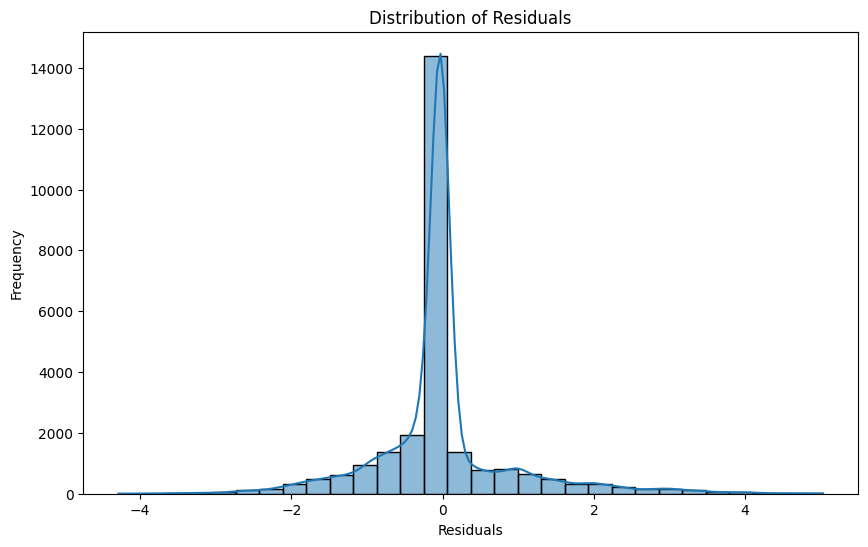

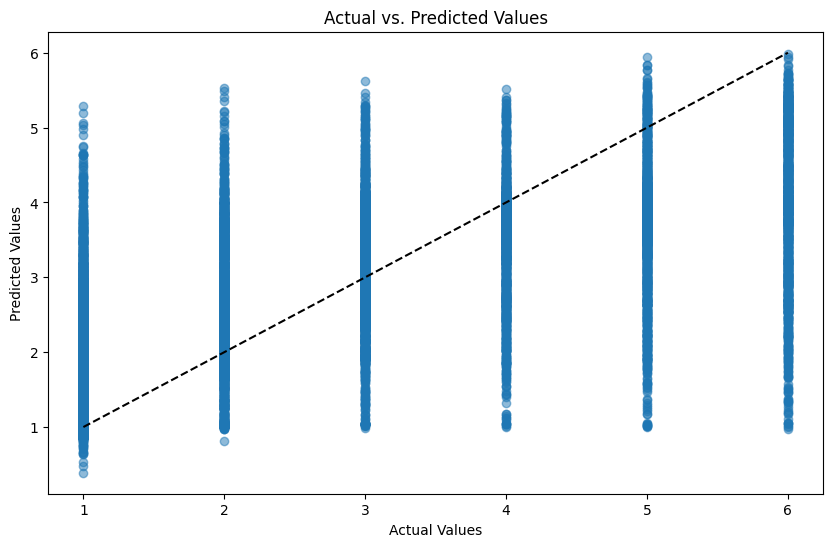

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals, which are the differences between the actual values (y_val_orig) and
# the predicted values from the model (y_val_pred_lgbm).
residuals = y_val_orig - y_val_pred_lgbm

# Plotting the distribution of residuals.
plt.figure(figsize=(10, 6))  # Set the size of the plot.
sns.histplot(residuals, kde=True, bins=30)  # Create a histogram with a kernel density estimate.
plt.title('Distribution of Residuals')  # Add a title to the plot.
plt.xlabel('Residuals')  # Label the x-axis as 'Residuals'.
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'.
plt.show()  # Display the plot.

# Creating a scatter plot to compare the actual values vs. the predicted values.
plt.figure(figsize=(10, 6))  # Set the size of the plot.
plt.scatter(y_val_orig, y_val_pred_lgbm, alpha=0.5)  # Create a scatter plot with some transparency.
plt.title('Actual vs. Predicted Values')  # Add a title to the plot.
plt.xlabel('Actual Values')  # Label the x-axis as 'Actual Values'.
plt.ylabel('Predicted Values')  # Label the y-axis as 'Predicted Values'.
# Adding a diagonal line representing perfect predictions for reference.
plt.plot([y_val_orig.min(), y_val_orig.max()], [y_val_orig.min(), y_val_orig.max()], 'k--')
plt.show()  # Display the plot.

In [33]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best LightGBM model.
# This involves dividing the dataset into 'cv=5' folds and evaluating the model on each fold.
# The 'scoring' parameter is set to 'neg_mean_squared_error' to evaluate the model's performance.
cv_scores = cross_val_score(best_lgbm_model, X_train, y_train_orig, cv=5, scoring='neg_mean_squared_error')

# Calculate the Root Mean Squared Error (RMSE) for each fold.
# The neg_mean_squared_error scores are negated and square rooted to get the RMSE.
rmse_scores = np.sqrt(-cv_scores)

# Display the results of the cross-validation.
# This includes the RMSE for each fold, the mean RMSE across all folds, and the standard deviation.
print("Cross-Validation RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 52747, number of used features: 16
[LightGBM] [Info] Start training from score 1.343451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2396
[LightGBM] [Info] Number of data points in the train set: 52747, number of used features: 16
[LightGBM] [Info] Start training from score 1.339868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [ ]:
from sklearn.metrics import mean_squared_error

# Predicting the target values for the test dataset using the best LightGBM model.
y_test_pred = best_lgbm_model.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE) for the test dataset.
# The 'mean_squared_error' function computes the mean squared error between the actual values (y_test_orig)
# and the predicted values (y_test_pred). The 'squared=False' parameter returns the RMSE.
test_rmse = mean_squared_error(y_test_orig, y_test_pred, squared=False)

# Displaying the RMSE for the test dataset.
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.38433662816767156


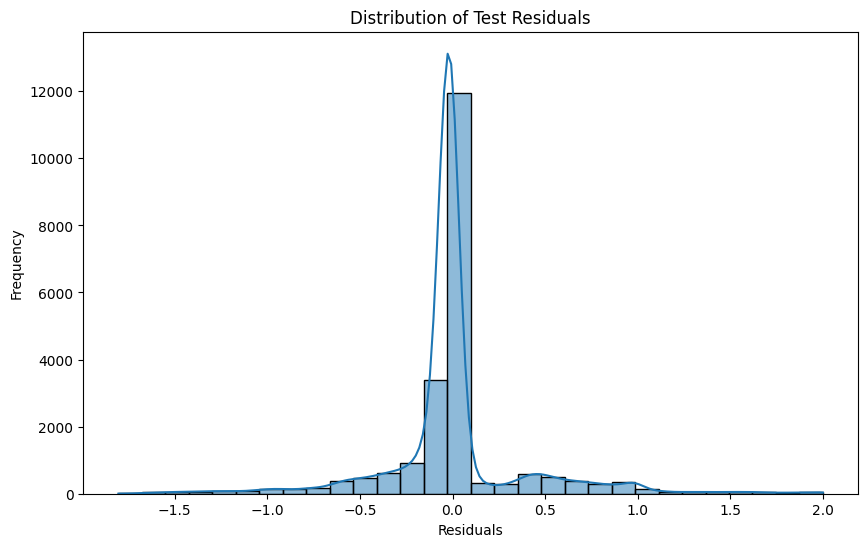

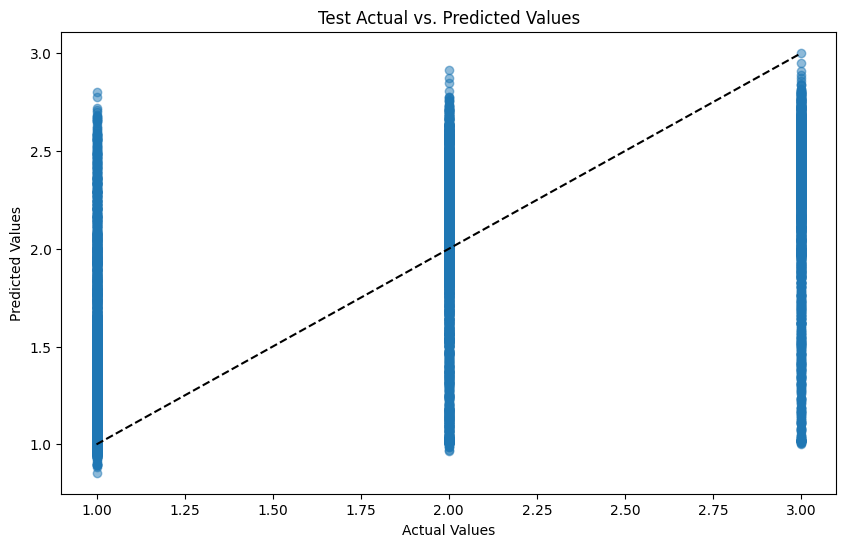

In [ ]:
import seaborn as sns

# Calculate residuals on the test set.
# Residuals are the differences between the actual values (y_test_orig) and the predicted values (y_test_pred).
test_residuals = y_test_orig - y_test_pred

# Plotting the distribution of residuals for the test set.
plt.figure(figsize=(10, 6))  # Setting the size of the plot.
sns.histplot(test_residuals, kde=True, bins=30)  # Creating a histogram with kernel density estimate.
plt.title('Distribution of Test Residuals')  # Adding a title to the plot.
plt.xlabel('Residuals')  # Labeling the x-axis as 'Residuals'.
plt.ylabel('Frequency')  # Labeling the y-axis as 'Frequency'.
plt.show()  # Displaying the plot.

# Creating a scatter plot to compare the actual values vs. the predicted values on the test set.
plt.figure(figsize=(10, 6))  # Setting the size of the plot.
plt.scatter(y_test_orig, y_test_pred, alpha=0.5)  # Creating a scatter plot with some transparency.
plt.title('Test Actual vs. Predicted Values')  # Adding a title to the plot.
plt.xlabel('Actual Values')  # Labeling the x-axis as 'Actual Values'.
plt.ylabel('Predicted Values')  # Labeling the y-axis as 'Predicted Values'.
# Adding a diagonal line representing perfect predictions for reference.
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'k--')
plt.show()  # Displaying the plot.

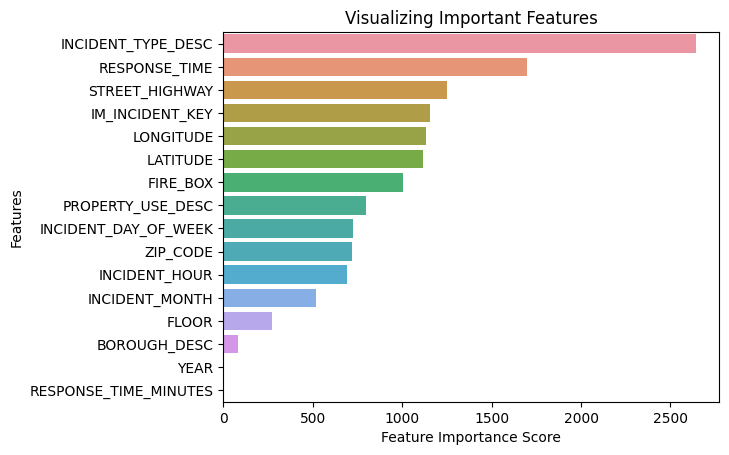

In [34]:
# Extracting feature importances from the best LightGBM model.
# This is converted into a pandas Series for easy manipulation, with the index set to the column names of 'X_train'.
feature_importances = pd.Series(best_lgbm_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot to visualize the feature importances.
sns.barplot(x=feature_importances, y=feature_importances.index)  # Plotting the feature importances.
plt.xlabel('Feature Importance Score')  # Labeling the x-axis.
plt.ylabel('Features')  # Labeling the y-axis.
plt.title('Visualizing Important Features')  # Adding a title to the plot.
plt.show()  # Displaying the plot.


In [1]:
# The '!' at the beginning allows you to run shell commands directly from the Jupyter Notebook.
# 'pip install' is the Python package installer, used here to install the 'shap' library.
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.1 MB/s eta 0:00:00


100%|===================| 21721/21723 [03:01<00:00]       

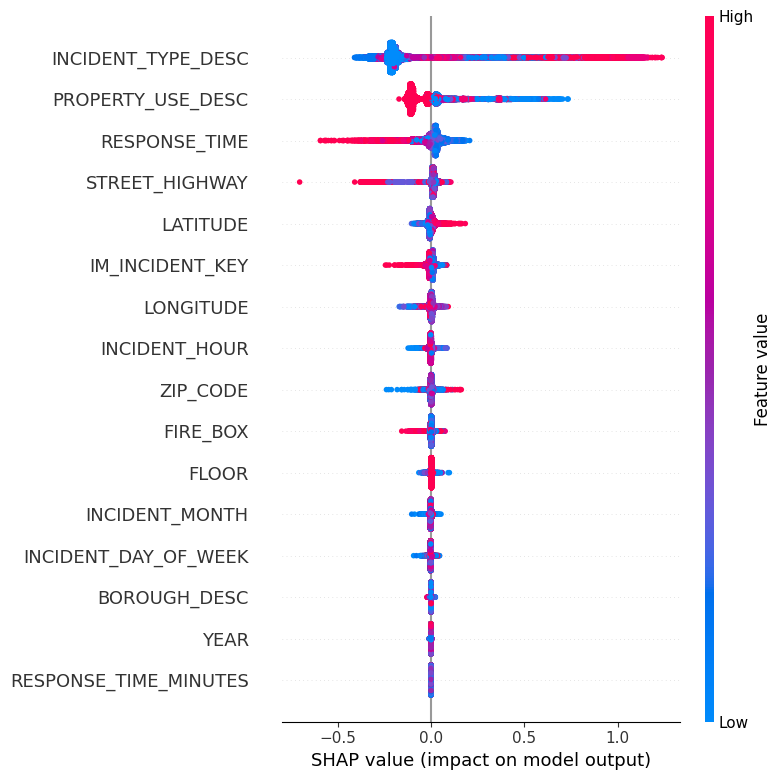

In [35]:
import shap  # Importing the SHAP library

# Create a SHAP explainer object.
# This object is initialized with the best performing LightGBM model (best_lgbm_model) and the training data (X_train).
explainer = shap.Explainer(best_lgbm_model, X_train)

# Calculate SHAP values for the test dataset (X_test).
# These values explain the impact of each feature on the model's prediction for each instance in the dataset.
# The 'check_additivity' flag is set to False to bypass the additivity check in case of inconsistencies.
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Plotting the summary plot using the calculated SHAP values.
# This plot shows the importance of each feature and the direction of their impact on the model's output.
# Feature names are taken from the columns of 'X_test'.
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [36]:
import joblib

# Saving the trained LightGBM model to a file using Joblib's dump function.
# 'best_lgbm_model' is the trained model that you want to save.
joblib.dump(best_lgbm_model, '/content/drive/MyDrive/master_thesis/best_lgbm_model2.pkl')

['/content/drive/MyDrive/master_thesis/best_lgbm_model2.pkl']